# Pre-processing

In [2]:
pip install transformers[torch]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 7.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [3]:
import pandas as pd
import numpy as np

from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

In [4]:
test_link = 'https://raw.githubusercontent.com/aleksandr7du/french_sentences/main/unlabelled_test_data.csv'
train_link = 'https://raw.githubusercontent.com/aleksandr7du/french_sentences/main/training_data.csv'
df_train = pd.read_csv(train_link)
df_test = pd.read_csv(test_link)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving unlabelled_test_data.csv to unlabelled_test_data (1).csv


In [ ]:
df_train = pd.read_csv('training_data.csv')

In [ ]:
df_test = pd.read_csv('unlabelled_test_data.csv')

In [3]:
df_train.head(2)

,id,sentence,difficulty
0,0,Les coûts kilométriques réels peuvent diverger...,C1
1,1,"Le bleu, c'est ma couleur préférée mais je n'a...",A1


# Basic models

**Logistic Regression**


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = log_reg.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy = round(accuracy_score(y_val, y_val_pred), 2)
print("Validation Accuracy:", validation_accuracy)

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_dt, average='weighted')

print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Calculate precision, recall, and F1-score
classification_report_val = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_val)

Validation Accuracy: 0.45
Overall Precision: 0.3
Overall Recall: 0.31
Overall F1-score: 0.3

Classification Report:
               precision    recall  f1-score   support

          A1       0.49      0.64      0.56       166
          A2       0.33      0.30      0.31       158
          B1       0.43      0.29      0.35       166
          B2       0.46      0.44      0.45       153
          C1       0.45      0.46      0.46       152
          C2       0.51      0.57      0.54       165

    accuracy                           0.45       960
   macro avg       0.45      0.45      0.44       960
weighted avg       0.45      0.45      0.44       960



For a linear regression it is possible to make a small improvement, but the result is still far from a decent level.

In [ ]:
# Reinitialize the TF-IDF Vectorizer with increased features and including bi-grams and tri-grams
tfidf_enhanced = TfidfVectorizer(lowercase=True, max_features=20000, ngram_range=(1, 3))

# Fit and transform the training data
X_train_tfidf_enhanced = tfidf_enhanced.fit_transform(df_train['sentence'])

# Transform the test data using the same enhanced vectorizer
X_test_tfidf_enhanced = tfidf_enhanced.transform(df_test['sentence'])

# Using the same label encoder as before
# Split the enhanced training data into train and validation sets
X_train_enhanced, X_val_enhanced, y_train, y_val = train_test_split(X_train_tfidf_enhanced, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
X_train_enhanced.shape, X_val_enhanced.shape, X_test_tfidf_enhanced.shape

# Reinitialize and train the logistic regression model with the enhanced features
log_reg_enhanced = LogisticRegression(max_iter=1000, random_state=42)
log_reg_enhanced.fit(X_train_enhanced, y_train)

# Predict on the enhanced validation set
y_val_pred_enhanced = log_reg_enhanced.predict(X_val_enhanced)

# Calculate accuracy on the enhanced validation set
validation_accuracy_enhanced = accuracy_score(y_val, y_val_pred_enhanced)
print("Accuracy:", round(validation_accuracy_enhanced, 2))

Accuracy: 0.46


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
import joblib
import os
from zipfile import ZipFile

# Example DataFrame creation, replace this with your actual DataFrame loading
# df_train = pd.read_csv('train_data.csv')
# df_test = pd.read_csv('test_data.csv')


# Ensure 'sentence' and 'difficulty' columns are present in training DataFrame
required_columns_train = ['sentence', 'difficulty']
for col in required_columns_train:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training DataFrame")

# Ensure 'sentence' column is present in test DataFrame
required_columns_test = ['sentence']
for col in required_columns_test:
    if col not in df_test.columns:
        raise KeyError(f"Column '{col}' not found in test DataFrame")

# Initialize Label Encoder and encode the difficulty levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['sentence'], y_train_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, max_features=20000, ngram_range=(1, 3))),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__solver': ['liblinear', 'lbfgs']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Save the trained model to a file
model_filename = 'best_logistic_regression_model.joblib'
joblib.dump(best_model, model_filename)

# Save the label encoder to a file
label_encoder_filename = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_filename)

# Zip the saved model and label encoder files
zip_filename = 'trained_model_and_encoder.zip'
with ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_filename)
    zipf.write(label_encoder_filename)

# Download the zipped model file
from google.colab import files
files.download(zip_filename)

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy = round(accuracy_score(y_val, y_val_pred), 2)
print("Validation Accuracy:", validation_accuracy)

# Calculate overall precision, recall, and F1-score on the validation set
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')
print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Print classification report on the validation set
classification_report_val = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_val)

# Predict the difficulty levels for the test set
X_test = df_test['sentence']
y_test_pred = best_model.predict(X_test)

# Decode the predicted difficulty levels back to their original labels
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Add the predictions to the test DataFrame
df_test['predicted_difficulty'] = y_test_pred_decoded

# Save the predictions to a new CSV file (optional)
# df_test.to_csv('test_predictions.csv', index=False)

# Display the first few rows of the test DataFrame with predictions
print(df_test.head())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Validation Accuracy: 0.46
Overall Precision: 0.45
Overall Recall: 0.46
Overall F1-score: 0.45

Classification Report:
               precision    recall  f1-score   support

          A1       0.55      0.61      0.58       166
          A2       0.38      0.37      0.38       158
          B1       0.41      0.36      0.38       166
          B2       0.42      0.35      0.38       153
          C1       0.43      0.42      0.42       152
          C2       0.50      0.62      0.55       165

    accuracy                           0.46       960
   macro avg       0.45      0.45      0.45       960
weighted avg       0.45      0.46      0.45       960

   id                                           sentence predicted_difficulty
0   0  Nous dûmes nous excuser des propos que nous eû...                   C2
1   1  Vous ne pouvez pas savoir le plaisir que j'ai ...                   B1
2   2  Et, paradoxalement, boire froid n'est pas la b...                   A1
3   3  Ce n'est pas étonna

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Validation Accuracy: 0.46
Overall Precision: 0.45
Overall Recall: 0.46
Overall F1-score: 0.45

Classification Report:
               precision    recall  f1-score   support

          A1       0.55      0.61      0.58       166
          A2       0.38      0.37      0.38       158
          B1       0.41      0.36      0.38       166
          B2       0.42      0.35      0.38       153
          C1       0.43      0.42      0.42       152
          C2       0.50      0.62      0.55       165

    accuracy                           0.46       960
   macro avg       0.45      0.45      0.45       960
weighted avg       0.45      0.46      0.45       960

   id                                           sentence predicted_difficulty
0   0  Nous dûmes nous excuser des propos que nous eû...                   C2
1   1  Vous ne pouvez pas savoir le plaisir que j'ai ...                   B1
2   2  Et, paradoxalement, boire froid n'est pas la b...                   A1
3   3  Ce n'est pas étonna

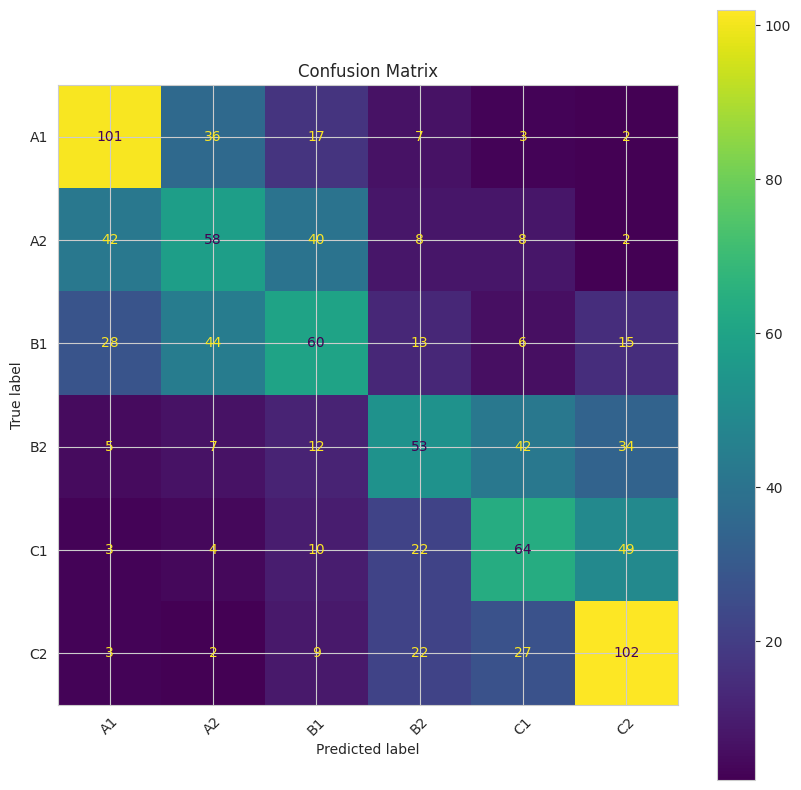

Displaying 5 examples of erroneous predictions:

                                               sentence true_label  \
2908  Les Français ne cèdent pas au chacun pour soi,...         B2   
8     J'ai retrouvé le plaisir de manger un oeuf à l...         A2   
2867  Je vois trois pommes de terre, mais elles ne s...         A1   
3509                Ce sera inoubliable, j'en suis sûr!         A1   
3121  Et soudain elle est devant moi, mes lunettes à...         A2   

     predicted_label  
2908              B1  
8                 B1  
2867              B2  
3509              A2  
3121              A1  


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
import joblib
import os
from zipfile import ZipFile
import matplotlib.pyplot as plt

# Example DataFrame creation, replace this with your actual DataFrame loading
# df_train = pd.read_csv('train_data.csv')
# df_test = pd.read_csv('test_data.csv')

# Ensure 'sentence' and 'difficulty' columns are present in training DataFrame
required_columns_train = ['sentence', 'difficulty']
for col in required_columns_train:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training DataFrame")

# Ensure 'sentence' column is present in test DataFrame
required_columns_test = ['sentence']
for col in required_columns_test:
    if col not in df_test.columns:
        raise KeyError(f"Column '{col}' not found in test DataFrame")

# Initialize Label Encoder and encode the difficulty levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['sentence'], y_train_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, max_features=20000, ngram_range=(1, 3))),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__solver': ['liblinear', 'lbfgs']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Save the trained model to a file
model_filename = 'best_logistic_regression_model.joblib'
joblib.dump(best_model, model_filename)

# Save the label encoder to a file
label_encoder_filename = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_filename)

# Zip the saved model and label encoder files
zip_filename = 'trained_model_and_encoder.zip'
with ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_filename)
    zipf.write(label_encoder_filename)

# Download the zipped model file
from google.colab import files
files.download(zip_filename)

# Predict on the validation set
y_val_pred = best_model.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy = round(accuracy_score(y_val, y_val_pred), 2)
print("Validation Accuracy:", validation_accuracy)

# Calculate overall precision, recall, and F1-score on the validation set
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')
print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Print classification report on the validation set
classification_report_val = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_val)

# Predict the difficulty levels for the test set
X_test = df_test['sentence']
y_test_pred = best_model.predict(X_test)

# Decode the predicted difficulty levels back to their original labels
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Add the predictions to the test DataFrame
df_test['predicted_difficulty'] = y_test_pred_decoded

# Save the predictions to a new CSV file (optional)
# df_test.to_csv('test_predictions.csv', index=False)

# Display the first few rows of the test DataFrame with predictions
print(df_test.head())

# Confusion Matrix and Erroneous Predictions

# Convert true validation labels back to original labels
true_val_labels = label_encoder.inverse_transform(y_val)

# Convert validation predictions back to original labels
pred_val_labels = label_encoder.inverse_transform(y_val_pred)

# Ensure the lengths match
if len(true_val_labels) == len(pred_val_labels):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(true_val_labels, pred_val_labels, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

    # Create a DataFrame to compare true and predicted labels for validation set
    comparison_df = pd.DataFrame({
        'sentence': X_val,
        'true_label': true_val_labels,
        'predicted_label': pred_val_labels
    })

    # Identify erroneous predictions
    erroneous_predictions = comparison_df[comparison_df['true_label'] != comparison_df['predicted_label']]

    # Display some examples of erroneous predictions
    num_examples = 5  # Number of examples to display
    print(f"Displaying {num_examples} examples of erroneous predictions:\n")
    print(erroneous_predictions.head(num_examples))

else:
    print("Error: The lengths of true_val_labels and pred_val_labels do not match.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Validation Accuracy: 0.46
Overall Precision: 0.45
Overall Recall: 0.46
Overall F1-score: 0.45

Classification Report:
               precision    recall  f1-score   support

          A1       0.55      0.61      0.58       166
          A2       0.38      0.37      0.38       158
          B1       0.41      0.36      0.38       166
          B2       0.42      0.35      0.38       153
          C1       0.43      0.42      0.42       152
          C2       0.50      0.62      0.55       165

    accuracy                           0.46       960
   macro avg       0.45      0.45      0.45       960
weighted avg       0.45      0.46      0.45       960

   id                                           sentence predicted_difficulty
0   0  Nous dûmes nous excuser des propos que nous eû...                   C2
1   1  Vous ne pouvez pas savoir le plaisir que j'ai ...                   B1
2   2  Et, paradoxalement, boire froid n'est pas la b...                   A1
3   3  Ce n'est pas étonna

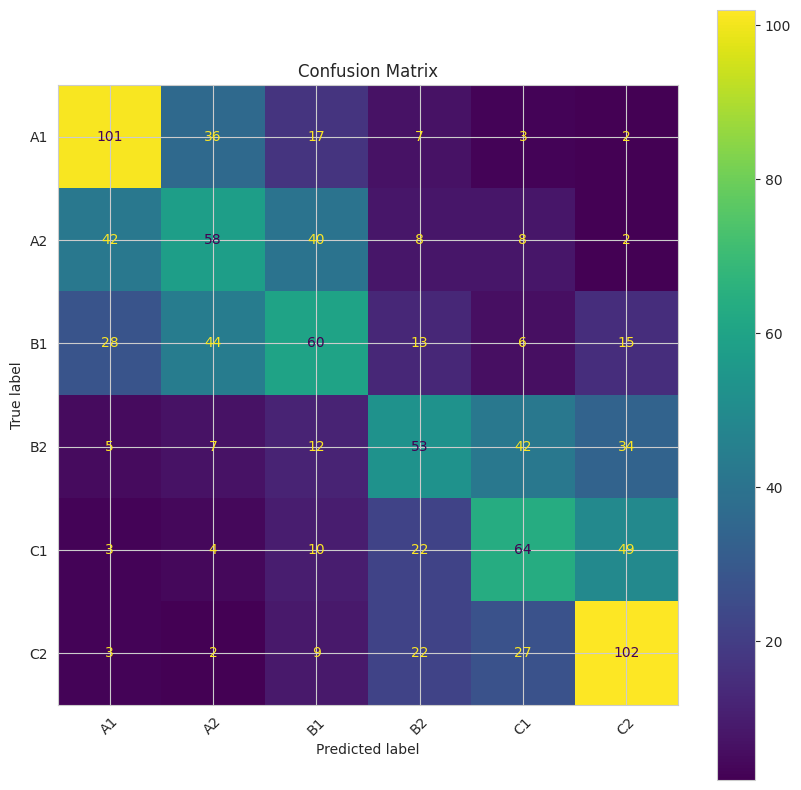

Displaying 5 examples of erroneous predictions:

                                               sentence true_label  \
2908  Les Français ne cèdent pas au chacun pour soi,...         B2   
8     J'ai retrouvé le plaisir de manger un oeuf à l...         A2   
2867  Je vois trois pommes de terre, mais elles ne s...         A1   
3509                Ce sera inoubliable, j'en suis sûr!         A1   
3121  Et soudain elle est devant moi, mes lunettes à...         A2   

     predicted_label  
2908              B1  
8                 B1  
2867              B2  
3509              A2  
3121              A1  


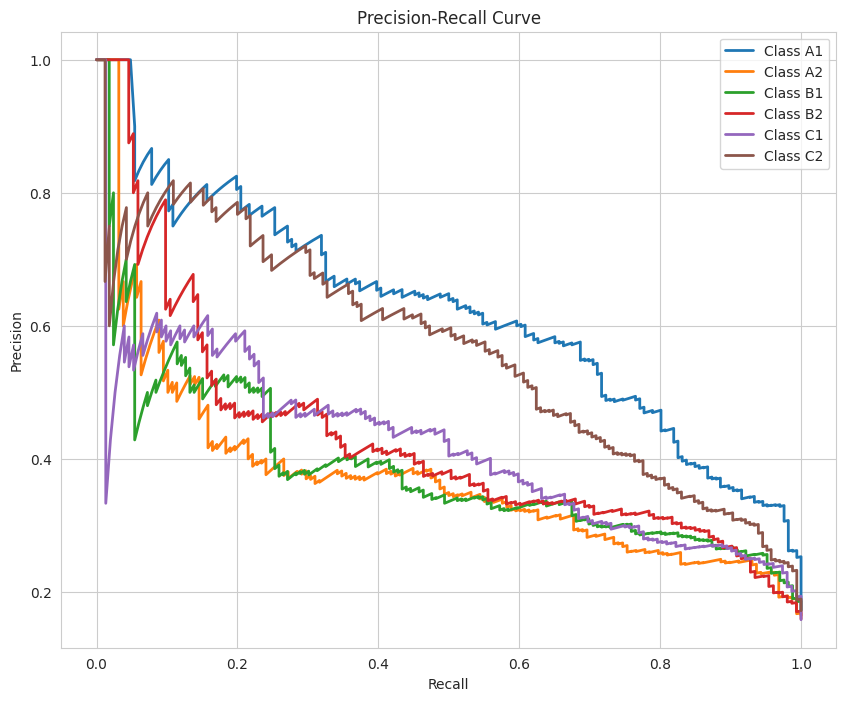

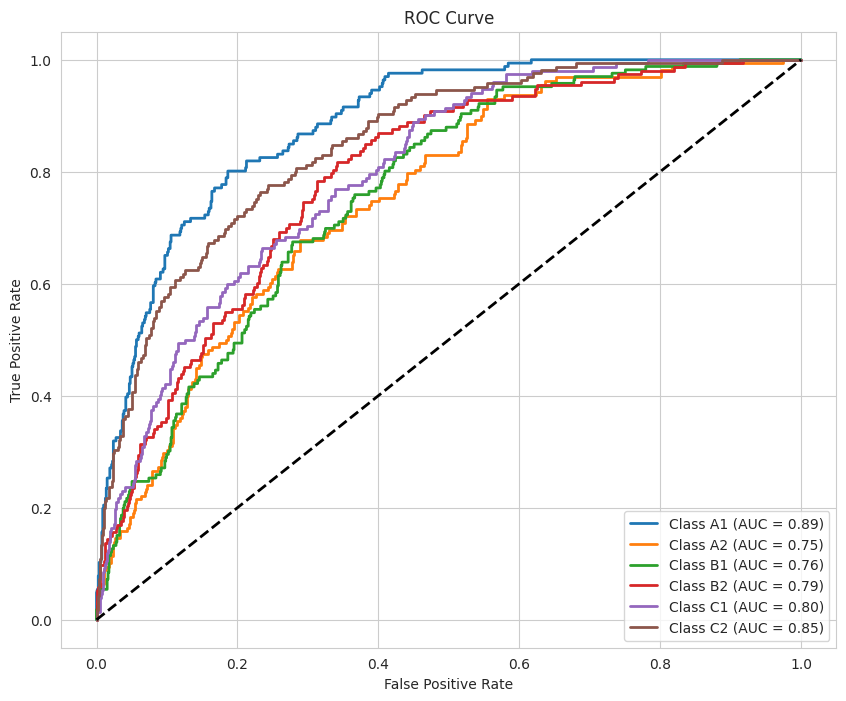


Top positive features for class 'A1':
['il de la', 'merci', 'appelle', 'faim', 'travaille', 'va', 'bonjour', 'habite', 'aime', 'est']
Top negative features for class 'A1':
['de', 'les', 'que', 'du', 'des', 'en', 'par', 'qui', 'la', 'mais']

Top positive features for class 'A2':
['aventure', 'allure', 'est', 'est dans', 'maintenant', 'très bientôt', 'moi', 'je', 'ai', 'école']
Top negative features for class 'A2':
['des', 'de', 'ces', 'les', 'une', 'ou', 'du', 'qui', 'cette', 'sans']

Top positive features for class 'B1':
['quand', 'région', 'prévu', 'délicieux', 'la fin', 'il', 'fin', 'je ai', 'on', 'pas']
Top negative features for class 'B1':
['sa', 'assez', 'elle était', 'fais', 'des', 'mangé', 'petit', 'ellénore', 'de leur', 'autre']

Top positive features for class 'B2':
['branches', 'grandes', 'exploitation', 'la forêt', 'les', 'être', 'forêt', 'interdiction', 'anecdote', 'déchets']
Top negative features for class 'B2':
['je', 'pas', 'on', 'moi', 'mon', 'tu', 'ne', 'école', 'est'

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, classification_report,
                             precision_recall_fscore_support, confusion_matrix,
                             ConfusionMatrixDisplay, precision_recall_curve,
                             roc_curve, roc_auc_score)
import joblib
import matplotlib.pyplot as plt
import numpy as np

# Example DataFrame creation, replace this with your actual DataFrame loading
# df_train = pd.read_csv('train_data.csv')
# df_test = pd.read_csv('test_data.csv')

# Ensure 'sentence' and 'difficulty' columns are present in training DataFrame
required_columns_train = ['sentence', 'difficulty']
for col in required_columns_train:
    if col not in df_train.columns:
        raise KeyError(f"Column '{col}' not found in training DataFrame")

# Ensure 'sentence' column is present in test DataFrame
required_columns_test = ['sentence']
for col in required_columns_test:
    if col not in df_test.columns:
        raise KeyError(f"Column '{col}' not found in test DataFrame")

# Initialize Label Encoder and encode the difficulty levels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Split the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(df_train['sentence'], y_train_encoded, test_size=0.2, random_state=42)

# Create a pipeline with TF-IDF vectorizer and logistic regression model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, max_features=20000, ngram_range=(1, 3))),
    ('log_reg', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'log_reg__C': [0.1, 1, 10],
    'log_reg__solver': ['liblinear', 'lbfgs']
}

# Initialize Grid Search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Save the trained model to a file
model_filename = 'best_logistic_regression_model.joblib'
joblib.dump(best_model, model_filename)

# Save the label encoder to a file
label_encoder_filename = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_filename)

# Zip the saved model and label encoder files
zip_filename = 'trained_model_and_encoder.zip'
with ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_filename)
    zipf.write(label_encoder_filename)

# Download the zipped model file
from google.colab import files
files.download(zip_filename)

# Predict on the validation set
y_val_pred = best_model.predict(X_val)
y_val_prob = best_model.predict_proba(X_val)

# Calculate accuracy on the validation set
validation_accuracy = round(accuracy_score(y_val, y_val_pred), 2)
print("Validation Accuracy:", validation_accuracy)

# Calculate overall precision, recall, and F1-score on the validation set
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred, average='weighted')
print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Print classification report on the validation set
classification_report_val = classification_report(y_val, y_val_pred, target_names=label_encoder.classes_)
print("Classification Report:\n", classification_report_val)

# Predict the difficulty levels for the test set
X_test = df_test['sentence']
y_test_pred = best_model.predict(X_test)

# Decode the predicted difficulty levels back to their original labels
y_test_pred_decoded = label_encoder.inverse_transform(y_test_pred)

# Add the predictions to the test DataFrame
df_test['predicted_difficulty'] = y_test_pred_decoded

# Save the predictions to a new CSV file (optional)
# df_test.to_csv('test_predictions.csv', index=False)

# Display the first few rows of the test DataFrame with predictions
print(df_test.head())

# Confusion Matrix and Erroneous Predictions

# Convert true validation labels back to original labels
true_val_labels = label_encoder.inverse_transform(y_val)

# Convert validation predictions back to original labels
pred_val_labels = label_encoder.inverse_transform(y_val_pred)

# Ensure the lengths match
if len(true_val_labels) == len(pred_val_labels):
    # Generate the confusion matrix
    conf_matrix = confusion_matrix(true_val_labels, pred_val_labels, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.title("Confusion Matrix")
    plt.show()

    # Create a DataFrame to compare true and predicted labels for validation set
    comparison_df = pd.DataFrame({
        'sentence': X_val,
        'true_label': true_val_labels,
        'predicted_label': pred_val_labels
    })

    # Identify erroneous predictions
    erroneous_predictions = comparison_df[comparison_df['true_label'] != comparison_df['predicted_label']]

    # Display some examples of erroneous predictions
    num_examples = 5  # Number of examples to display
    print(f"Displaying {num_examples} examples of erroneous predictions:\n")
    print(erroneous_predictions.head(num_examples))

else:
    print("Error: The lengths of true_val_labels and pred_val_labels do not match.")

# Precision-Recall Curve for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(label_encoder.classes_):
    precision, recall, _ = precision_recall_curve(y_val == i, y_val_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {class_label}')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="best")
plt.show()

# ROC Curve for each class
fig, ax = plt.subplots(figsize=(10, 8))
for i, class_label in enumerate(label_encoder.classes_):
    fpr, tpr, _ = roc_curve(y_val == i, y_val_prob[:, i])
    roc_auc = roc_auc_score(y_val == i, y_val_prob[:, i])
    plt.plot(fpr, tpr, lw=2, label=f'Class {class_label} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="best")
plt.show()

# Feature Importance
tfidf = best_model.named_steps['tfidf']
log_reg = best_model.named_steps['log_reg']

# Get the feature names and their coefficients
feature_names = tfidf.get_feature_names_out()
coef = log_reg.coef_

# Display top 10 positive and negative features for each class
for i, class_label in enumerate(label_encoder.classes_):
    top_positive_indices = np.argsort(coef[i])[-10:]
    top_negative_indices = np.argsort(coef[i])[:10]
    print(f"\nTop positive features for class '{class_label}':")
    print([feature_names[j] for j in top_positive_indices])
    print(f"Top negative features for class '{class_label}':")
    print([feature_names[j] for j in top_negative_indices])


**KNN**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize the KNN model with a chosen number of neighbors, let's start with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_knn = knn_model.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy_knn = round(accuracy_score(y_val, y_val_pred_knn), 2)
print("Validation Accuracy (KNN):", validation_accuracy_knn)

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_dt, average='weighted')

print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Calculate precision, recall, and F1-score
classification_report_knn = classification_report(y_val, y_val_pred_knn, target_names=label_encoder.classes_)
print("Classification Report (KNN):\n", classification_report_knn)

Validation Accuracy (KNN): 0.33
Overall Precision: 0.3
Overall Recall: 0.31
Overall F1-score: 0.3

Classification Report (KNN):
               precision    recall  f1-score   support

          A1       0.30      0.79      0.43       166
          A2       0.24      0.24      0.24       158
          B1       0.21      0.11      0.14       166
          B2       0.61      0.20      0.30       153
          C1       0.40      0.43      0.41       152
          C2       0.63      0.22      0.32       165

    accuracy                           0.33       960
   macro avg       0.40      0.33      0.31       960
weighted avg       0.40      0.33      0.31       960



**Decision Tree**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dt = decision_tree.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy_dt = round(accuracy_score(y_val, y_val_pred_dt), 2)
print("Validation Accuracy (Decision Tree):", validation_accuracy_dt)

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_dt, average='weighted')

print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Calculate precision, recall, and F1-score
classification_report_dt = classification_report(y_val, y_val_pred_dt, target_names=label_encoder.classes_)
print("Classification Report (Decision Tree):\n", classification_report_dt)

Validation Accuracy (Decision Tree): 0.31
Overall Precision: 0.3
Overall Recall: 0.31
Overall F1-score: 0.3

Classification Report (Decision Tree):
               precision    recall  f1-score   support

          A1       0.44      0.51      0.47       166
          A2       0.23      0.20      0.21       158
          B1       0.24      0.22      0.23       166
          B2       0.26      0.30      0.28       153
          C1       0.32      0.30      0.31       152
          C2       0.33      0.30      0.31       165

    accuracy                           0.31       960
   macro avg       0.30      0.31      0.30       960
weighted avg       0.30      0.31      0.30       960



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model
decision_tree.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_dt = decision_tree.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy_dt = accuracy_score(y_val, y_val_pred_dt)
print("Validation Accuracy (Decision Tree):", validation_accuracy_dt)

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_dt, average='weighted')

print("Overall Precision:", precision)
print("Overall Recall:", recall)
print("Overall F1-score:", f1_score)

# Optional: Detailed classification report
classification_report_dt = classification_report(y_val, y_val_pred_dt, target_names=label_encoder.classes_)
print("Classification Report (Decision Tree):\n", classification_report_dt)

(3840, 10000) (960, 10000) (1200, 10000)
Validation Accuracy (Decision Tree): 0.3072916666666667
Overall Precision: 0.3025621064733589
Overall Recall: 0.3072916666666667
Overall F1-score: 0.3037726801388617
Classification Report (Decision Tree):
               precision    recall  f1-score   support

          A1       0.44      0.51      0.47       166
          A2       0.23      0.20      0.21       158
          B1       0.24      0.22      0.23       166
          B2       0.26      0.30      0.28       153
          C1       0.32      0.30      0.31       152
          C2       0.33      0.30      0.31       165

    accuracy                           0.31       960
   macro avg       0.30      0.31      0.30       960
weighted avg       0.30      0.31      0.30       960



**Random Forest**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize the Random Forest model
random_forest = RandomForestClassifier(random_state=42)

# Train the Random Forest model
random_forest.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_rf = random_forest.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
print("Validation Accuracy (Random Forest):", round(validation_accuracy_rf, 2))

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_rf, average='weighted')

print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Optional: Detailed classification report
classification_report_rf = classification_report(y_val, y_val_pred_rf, target_names=label_encoder.classes_)
print("Classification Report (Random Forest):\n", classification_report_rf)

Validation Accuracy (Random Forest): 0.42
Overall Precision: 0.42
Overall Recall: 0.42
Overall F1-score: 0.4

Classification Report (Random Forest):
               precision    recall  f1-score   support

          A1       0.43      0.73      0.54       166
          A2       0.37      0.29      0.33       158
          B1       0.41      0.26      0.32       166
          B2       0.40      0.44      0.42       153
          C1       0.40      0.48      0.43       152
          C2       0.53      0.30      0.38       165

    accuracy                           0.42       960
   macro avg       0.42      0.42      0.40       960
weighted avg       0.42      0.42      0.40       960



**Neural Network**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer(lowercase=True, max_features=10000)

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(df_train['sentence'])

# Transform the test data using the same vectorizer
X_test_tfidf = tfidf.transform(df_test['sentence'])

# Encode the difficulty levels from the training data
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(df_train['difficulty'])

# Splitting the training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_tfidf, y_train_encoded, test_size=0.2, random_state=42)

# Display the shapes of the transformed data
# print(X_train.shape, X_val.shape, X_test_tfidf.shape)

# Initialize the Neural Network model
neural_network = MLPClassifier(random_state=42, max_iter=1000)

# Train the Neural Network model
neural_network.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_nn = neural_network.predict(X_val)

# Calculate accuracy on the validation set
validation_accuracy_nn = accuracy_score(y_val, y_val_pred_nn)
print("Validation Accuracy (Neural Network):", round(validation_accuracy_nn, 2))

# Calculate overall precision, recall, and F1-score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_val_pred_nn, average='weighted')

print("Overall Precision:", round(precision, 2))
print("Overall Recall:", round(recall, 2))
print("Overall F1-score:", round(f1_score, 2))
print()

# Optional: Detailed classification report
classification_report_nn = classification_report(y_val, y_val_pred_nn, target_names=label_encoder.classes_)
print("Classification Report (Neural Network):\n", classification_report_nn)

Validation Accuracy (Neural Network): 0.45
Overall Precision: 0.45
Overall Recall: 0.45
Overall F1-score: 0.45

Classification Report (Neural Network):
               precision    recall  f1-score   support

          A1       0.52      0.60      0.56       166
          A2       0.33      0.39      0.36       158
          B1       0.36      0.29      0.32       166
          B2       0.47      0.42      0.44       153
          C1       0.46      0.54      0.50       152
          C2       0.58      0.47      0.52       165

    accuracy                           0.45       960
   macro avg       0.45      0.45      0.45       960
weighted avg       0.45      0.45      0.45       960



# Advanced model

Basic models didn't show good results. To reach a better score, it is crucial to use different embeddings and more advanced techniques. Let's do this!

## NLTK

In some models (further) I will use it to generate additional data, that's why I will mention it in advance.



In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# -----

from nltk.corpus import wordnet
import random

def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word, lang='fra')  # Search for French synonyms
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_sentence.append(synonym)
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

# Generate synonyms for each sentence in the training set
data = df_train.copy()
generated_sentences = [synonym_replacement(sentence) for sentence in data['sentence']]

# ----

# Create a new DataFrame for generated sentences
generated_data = pd.DataFrame({
    'sentence': generated_sentences,
    'difficulty': data['difficulty']
})

# Combine with original data
combined_data = pd.concat([data, generated_data])

## Full Bert

As a first advanced model, I decided to use the **"bert-base-multilingual-cased"** as this model was pretrained on the top 104 languages with the largest Wikipedia.

The best achieved result was **56.2% accuracy**, after that I decided to try to use additional text embeddings and camerbert (french version of Bert). (In the **Appendix**, you can find some of the attempts with different parameters.)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=800):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.461200,1.246637
2,0.965100,0.995730
3,0.709200,1.068911
4,0.508600,1.403547


Validation Accuracy: 0.575


In [ ]:
submission.to_csv('sample_FB_010_001.csv', index=False)
from google.colab import files
files.download('sample_FB_010_001.csv')

Full Bert with text embeddings (NLTK) and lemmatization - the accuracy is 51.6.

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import wordnet
import random

def synonym_replacement(sentence):
    words = sentence.split()
    new_sentence = []
    for word in words:
        synonyms = wordnet.synsets(word, lang='fra')  # Search for French synonyms
        if synonyms:
            synonym = random.choice(synonyms).lemmas()[0].name()
            new_sentence.append(synonym)
        else:
            new_sentence.append(word)
    return ' '.join(new_sentence)

# Generate synonyms for each sentence in the training set
data = df_train.copy()
generated_sentences = [synonym_replacement(sentence) for sentence in data['sentence']]

# Create a new DataFrame for generated sentences
generated_data = pd.DataFrame({
    'sentence': generated_sentences,
    'difficulty': data['difficulty']
})

# Combine with original data
combined_data = pd.concat([data, generated_data])

# Load your data
data = combined_data
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings if key != 'token_type_ids'}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Load the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings if key != 'token_type_ids'}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_FB_nltk.csv', index=False)
from google.colab import files
files.download('sample_FB_nltk.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Epoch 1
-------------------------------
loss: 1.819430  [    0/ 8640]
loss: 1.722090  [   80/ 8640]
loss: 1.762729  [  160/ 8640]
loss: 1.673600  [  240/ 8640]
loss: 1.756749  [  320/ 8640]
loss: 1.518456  [  400/ 8640]
loss: 1.315417  [  480/ 8640]
loss: 1.509497  [  560/ 8640]
loss: 1.638610  [  640/ 8640]
loss: 1.650122  [  720/ 8640]
loss: 1.477011  [  800/ 8640]
loss: 1.632597  [  880/ 8640]
loss: 1.719302  [  960/ 8640]
loss: 1.696949  [ 1040/ 8640]
loss: 1.752251  [ 1120/ 8640]
loss: 1.850098  [ 1200/ 8640]
loss: 1.631422  [ 1280/ 8640]
loss: 1.672240  [ 1360/ 8640]
loss: 0.995170  [ 1440/ 8640]
loss: 1.218635  [ 1520/ 8640]
loss: 1.418727  [ 1600/ 8640]
loss: 1.762184  [ 1680/ 8640]
loss: 1.110772  [ 1760/ 8640]
loss: 1.609599  [ 1840/ 8640]
loss: 1.447784  [ 1920/ 8640]
loss: 1.547804  [ 2000/ 8640]
loss: 1.585217  [ 2080/ 8640]
loss: 1.266198  [ 2160/ 8640]
loss: 1.357282  [ 2240/ 8640]
loss: 1.036704  [ 2320/ 8640]
loss: 1.240535  [ 2400/ 8640]
loss: 0.956048  [ 2480/ 8640]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Camembert

Best model

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=800, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Epoch 1
-------------------------------
loss: 1.787679  [    0/ 4320]
loss: 1.759201  [   80/ 4320]
loss: 1.819446  [  160/ 4320]
loss: 1.761045  [  240/ 4320]
loss: 1.741475  [  320/ 4320]
loss: 1.710012  [  400/ 4320]
loss: 1.660189  [  480/ 4320]
loss: 1.710840  [  560/ 4320]
loss: 1.617915  [  640/ 4320]
loss: 1.588448  [  720/ 4320]
loss: 1.596875  [  800/ 4320]
loss: 1.588375  [  880/ 4320]
loss: 1.351236  [  960/ 4320]
loss: 1.467402  [ 1040/ 4320]
loss: 1.419346  [ 1120/ 4320]
loss: 1.554049  [ 1200/ 4320]
loss: 1.292367  [ 1280/ 4320]
loss: 1.418434  [ 1360/ 4320]
loss: 1.454612  [ 1440/ 4320]
loss: 1.357249  [ 1520/ 4320]
loss: 1.300206  [ 1600/ 4320]
loss: 1.395431  [ 1680/ 4320]
loss: 1.187509  [ 1760/ 4320]
loss: 1.318011  [ 1840/ 4320]
loss: 1.257766  [ 1920/ 4320]
loss: 1.252184  [ 2000/ 4320]
loss: 1.236168  [ 2080/ 4320]
loss: 1.301860  [ 2160/ 4320]
loss: 1.232212  [ 2240/ 4320]
loss: 1.477469  [ 2320/ 4320]
loss: 1.347853  [ 2400/ 4320]
loss: 1.158014  [ 2480/ 4320]


In [ ]:
import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
submission_df.to_csv('sample_new.csv', index=False)
from google.colab import files
files.download('sample_new.csv')

Let's try this model with NLTK.

*Accuracy of the model below is 0.565*

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=6, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=6, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cpu')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cpu') for key, value in inputs.items()}
            labels = labels.to('cpu')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cpu') for key, value in inputs.items()}
        labels = labels.to('cpu')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(6):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b6_lr3e5.csv', index=False)
from google.colab import files
files.download('sample_text_add_b6_lr3e5.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.780135  [    0/ 8640]
loss: 1.755576  [   60/ 8640]
loss: 1.822895  [  120/ 8640]


KeyboardInterrupt: 

In [ ]:
# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.7e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr17e4.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr17e4.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.805159  [    0/ 8640]
loss: 1.777842  [   80/ 8640]
loss: 1.828654  [  160/ 8640]
loss: 1.797761  [  240/ 8640]
loss: 1.770976  [  320/ 8640]
loss: 1.768090  [  400/ 8640]
loss: 1.697596  [  480/ 8640]
loss: 1.733081  [  560/ 8640]
loss: 1.668509  [  640/ 8640]
loss: 1.731325  [  720/ 8640]
loss: 1.596237  [  800/ 8640]
loss: 1.567631  [  880/ 8640]
loss: 1.580948  [  960/ 8640]
loss: 1.519274  [ 1040/ 8640]
loss: 1.351146  [ 1120/ 8640]
loss: 1.587449  [ 1200/ 8640]
loss: 1.411421  [ 1280/ 8640]
loss: 1.484440  [ 1360/ 8640]
loss: 1.437096  [ 1440/ 8640]
loss: 1.281033  [ 1520/ 8640]
loss: 1.288218  [ 1600/ 8640]
loss: 1.440888  [ 1680/ 8640]
loss: 1.459860  [ 1760/ 8640]
loss: 1.159467  [ 1840/ 8640]
loss: 1.386424  [ 1920/ 8640]
loss: 1.266188  [ 2000/ 8640]
loss: 1.183396  [ 2080/ 8640]
loss: 1.232461  [ 2160/ 8640]
loss: 1.191609  [ 2240/ 8640]
loss: 1.337035  [ 2320/ 8640]
loss: 1.490515  [ 2400/ 8640]
loss: 1.296418  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

I also tried models with **lemmatization** (with some success).

In [ ]:
# Run this in a cell in your Jupyter notebook or Google Colab
!pip install spacy
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 21.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


For example, the model below reached 0.573 accuracy.

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import spacy
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Load Spacy French model
nlp = spacy.load('fr_core_news_sm')

# Lemmatization function
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Synonym Replacement Function
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

# Get synonyms using NLTK's WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Augment and Lemmatize Data
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    # First, lemmatize
    lemmatized_sentence = lemmatize_text(original_sentence)
    # Then, augment via synonym replacement
    augmented_sentence = synonym_replacement(lemmatized_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(df_combined['difficulty'].tolist())

# Load Camembert tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenization function
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset Class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    df_combined['sentence'].tolist(), encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

# DataLoader
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural Network Model Definition
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.000017)

# Compute Accuracy Function
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training Loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute Training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch + 1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the Model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Prediction & Submission
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.eval()
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

predicted_labels = label_encoder.inverse_transform(all_predictions)

submission_df = pd.DataFrame({
    'id': df_test['id'],
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_lem_17e4_e5.csv', index=False)
from google.colab import files
files.download('sample_text_add_lem_17e4_e5.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Epoch 1
-------------------------------
loss: 1.798286  [    0/ 8640]
loss: 1.770983  [   80/ 8640]
loss: 1.750108  [  160/ 8640]
loss: 1.784353  [  240/ 8640]
loss: 1.698660  [  320/ 8640]
loss: 1.726839  [  400/ 8640]
loss: 1.823075  [  480/ 8640]
loss: 1.717239  [  560/ 8640]
loss: 1.659207  [  640/ 8640]
loss: 1.706909  [  720/ 8640]
loss: 1.500722  [  800/ 8640]
loss: 1.701954  [  880/ 8640]
loss: 1.537208  [  960/ 8640]
loss: 1.438291  [ 1040/ 8640]
loss: 1.469917  [ 1120/ 8640]
loss: 1.457222  [ 1200/ 8640]
loss: 1.445869  [ 1280/ 8640]
loss: 1.332990  [ 1360/ 8640]
loss: 1.565134  [ 1440/ 8640]
loss: 1.459732  [ 1520/ 8640]
loss: 1.741069  [ 1600/ 8640]
loss: 1.451294  [ 1680/ 8640]
loss: 1.474038  [ 1760/ 8640]
loss: 1.466886  [ 1840/ 8640]
loss: 1.376761  [ 1920/ 8640]
loss: 1.250723  [ 2000/ 8640]
loss: 1.261425  [ 2080/ 8640]
loss: 1.319154  [ 2160/ 8640]
loss: 1.252576  [ 2240/ 8640]
loss: 1.299881  [ 2320/ 8640]
loss: 1.562539  [ 2400/ 8640]
loss: 1.430410  [ 2480/ 8640]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Other models

I decided to try the most advanced model - **ChatGPT** 4.0. However, without paid token I couldn't even run 3.5-turbo version.

In [ ]:
!pip install --upgrade openai

import openai
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import time

# Set up your OpenAI API key
import os
from openai import OpenAI

client = OpenAI(
    # api_key=os.environ.get("OPENAI_API_KEY"),
    api_key = "sk-proj-UIqiUVzkxTzPPfCRvUDhT3BlbkFJ4XRZNwu8VGByj40XypG7"
)

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

# Function to classify text using OpenAI GPT
def classify_text(text):
    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
                {"role": "system", "content": "You are a text classification assistant."},
                {"role": "user", "content": f"Classify the following sentence into one of the predefined difficulty levels: '{text}'"}
            ]
        )
        classification = response['choices'][0]['message']['content'].strip()
        return classification
    except Exception as e:
        print(f"Error: {e}")
        time.sleep(1)  # To handle rate limits
        return classify_text(text)  # Retry

# Function to compute accuracy
def compute_accuracy(X, y, model):
    correct, total = 0, 0
    for text, label in zip(X, y):
        prediction = model(text)
        try:
            predicted_label = label_encoder.transform([prediction])[0]
        except ValueError:
            continue  # Handle cases where prediction is not a valid label
        if predicted_label == label:
            correct += 1
        total += 1
    return 100 * correct / total

# Classify training data
print("Classifying training data...")
train_predictions = [classify_text(text) for text in X_train]

# Classify test data
print("Classifying test data...")
test_predictions = [classify_text(text) for text in X_test]

# Convert predictions to encoded labels
y_train_pred = label_encoder.transform(train_predictions)
y_test_pred = label_encoder.transform(test_predictions)

# Compute accuracy
train_accuracy = compute_accuracy(X_train, y_train, classify_text)
test_accuracy = compute_accuracy(X_test, y_test, classify_text)

print(f"Train Accuracy: {train_accuracy:.2f}%")
print(f"Test Accuracy: {test_accuracy:.2f}%")

# Create the dataset and dataloader for df_test
class TestDataset:
    def __init__(self, texts):
        self.texts = texts

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return self.texts[idx]

test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Generate predictions for df_test
all_predictions = []
with torch.no_grad():
    for text in test_loader:
        predicted_label = classify_text(text)
        all_predictions.append(predicted_label)

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_api.csv', index=False)
from google.colab import files
files.download('sample_api.csv')

Classifying training data...
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}
Error: Error code: 429 - {'error': {'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, read the docs: https://platform.openai.com/docs/guides/error-codes/api-errors.', 'type': 'insufficient_quota', 'param': None, 'code': 'insufficient_quota'}}


KeyboardInterrupt: 

Further, I wanted to check some interesting models from Hugging Face such as a large version of Camembert. Nevertheless, it requires special access to it.

**Camembert-large** - [link](https://huggingface.co/almanach/camembert-large)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model (using 'camembert-large' instead of 'camembert-base')
tokenizer = CamembertTokenizer.from_pretrained('camembert-large')
camembert = CamembertModel.from_pretrained('camembert-large')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=800, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Load the tokenizer for test data
tokenizer = CamembertTokenizer.from_pretrained('camembert-large')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: camembert-large is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

**Flaubert large (& base)** - [link](https://huggingface.co/flaubert/flaubert_large_cased)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import FlaubertTokenizer, FlaubertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load Flaubert tokenizer and model (using 'flaubert-large-cased' instead of 'camembert-base')
tokenizer = FlaubertTokenizer.from_pretrained('flaubert-large-cased')
flaubert = FlaubertModel.from_pretrained('flaubert-large-cased')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=800, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.flaubert = flaubert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.flaubert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.flaubert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[0][:, 0]  # Use the first token's hidden state
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Load the tokenizer for test data
tokenizer = FlaubertTokenizer.from_pretrained('flaubert-large-cased')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})


submission_df.to_csv('sample_flaubert_large.csv', index=False)
from google.colab import files
files.download('sample_flaubert_large.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: flaubert-large-cased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import FlaubertTokenizer, FlaubertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load Flaubert tokenizer and model (using 'flaubert-base-cased' instead of 'flaubert-large-cased')
tokenizer = FlaubertTokenizer.from_pretrained('flaubert-base-cased')
flaubert = FlaubertModel.from_pretrained('flaubert-base-cased')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=800, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.flaubert = flaubert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.flaubert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.flaubert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[0][:, 0]  # Use the first token's hidden state
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Load the tokenizer for test data
tokenizer = FlaubertTokenizer.from_pretrained('flaubert-base-cased')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_flaubert_base.csv', index=False)
from google.colab import files
files.download('sample_flaubert_base.csv')

OSError: flaubert-base-cased is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

**T5 Model**

In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load T5 model and tokenizer for French
t5_tokenizer = T5Tokenizer.from_pretrained("t5-small")
t5_model = T5ForConditionalGeneration.from_pretrained("t5-small")

def paraphrase(sentence, max_length=70):
    input_text = f"paraphrase: {sentence}"
    input_ids = t5_tokenizer.encode(input_text, return_tensors="pt")
    output_ids = t5_model.generate(
        input_ids,
        max_length=max_length,
        num_return_sequences=1,
        no_repeat_ngram_size=2,
        top_k=50,
        top_p=0.95,
        temperature=0.7
    )
    return t5_tokenizer.decode(output_ids[0], skip_special_tokens=True)

# Apply paraphrasing to each sentence in the training set
df_train["similar_sentence"] = df_train["sentence"].apply(paraphrase)
print(df_train.head())

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:492: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:497: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.95` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (558 > 512). Running this sequence through the model will result in indexing errors


   id                                           sentence difficulty  \
0   0  Les coûts kilométriques réels peuvent diverger...         C1   
1   1  Le bleu, c'est ma couleur préférée mais je n'a...         A1   
2   2  Le test de niveau en français est sur le site ...         A1   
3   3           Est-ce que ton mari est aussi de Boston?         A1   
4   4  Dans les écoles de commerce, dans les couloirs...         B1   

   encoded_labels                                   similar_sentence  
0               0                                         Paraphrase  
1               1  Paraphrase: Le bleu, c'est ma couleur préférée...  
2               1                                         Paraphrase  
3               1  Paraphraser: Est-ce que ton mari est aussi de ...  
4               2                                         Paraphrase  


In [ ]:
df_train.to_csv('text_paraphrase.csv', index=False)
from google.colab import files
files.download('text_paraphrase.csv')

Additional **data augmentation**

In [ ]:
import pandas as pd
import nltk
from nltk.corpus import wordnet
from random import randint

nltk.download('wordnet')
nltk.download('omw-1.4')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):  # Ensure using French synsets
        for lemma in syn.lemmas('fra'):
            synonyms.add(lemma.name().replace('_', ' '))
    return list(synonyms)

def augment_sentence(sentence, num_changes=1):
    words = sentence.split()
    new_sentence = words[:]
    changed_indices = []
    for _ in range(num_changes):
        index = randint(0, len(words) - 1)
        if index in changed_indices:
            continue
        synonyms = get_synonyms(words[index])
        if synonyms:
            new_sentence[index] = synonyms[0]  # Replace with the first synonym
            changed_indices.append(index)
    return ' '.join(new_sentence)

# Load initial data


# Augment data
augmented_sentences = []
for index, row in df_train.iterrows():
    for _ in range(5):  # Generate 1000 similar sentences per existing sentence
        new_sentence = augment_sentence(row['sentence'])
        augmented_sentences.append({'sentence': new_sentence, 'difficulty': row['difficulty']})

# Save augmented data
df_augmented = pd.DataFrame(augmented_sentences)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df_augmented.to_csv('new_vocabulary_5.csv', index=False)
from google.colab import files
files.download('new_vocabulary_5.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_new_WordsGen.csv', index=False)
from google.colab import files
files.download('sample_new_WordsGen.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.805302  [    0/25920]
loss: 1.785404  [   80/25920]
loss: 1.790908  [  160/25920]
loss: 1.779276  [  240/25920]
loss: 1.828247  [  320/25920]
loss: 1.730804  [  400/25920]
loss: 1.743793  [  480/25920]
loss: 1.674758  [  560/25920]
loss: 1.663870  [  640/25920]
loss: 1.642494  [  720/25920]
loss: 1.683785  [  800/25920]
loss: 1.574817  [  880/25920]
loss: 1.503770  [  960/25920]
loss: 1.620801  [ 1040/25920]
loss: 1.605268  [ 1120/25920]
loss: 1.158272  [ 1200/25920]
loss: 1.762192  [ 1280/25920]
loss: 1.283984  [ 1360/25920]
loss: 1.216051  [ 1440/25920]
loss: 1.415188  [ 1520/25920]
loss: 1.279339  [ 1600/25920]
loss: 1.365729  [ 1680/25920]
loss: 1.228086  [ 1760/25920]
loss: 1.237842  [ 1840/25920]
loss: 1.270229  [ 1920/25920]
loss: 1.173385  [ 2000/25920]
loss: 1.257395  [ 2080/25920]
loss: 1.211244  [ 2160/25920]
loss: 1.286227  [ 2240/25920]


KeyboardInterrupt: 

Another note - **cross validation** also didn't work out.

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)

# K-Fold Cross-Validation setup
kf = KFold(n_splits=5, shuffle=True, random_state=42)
best_accuracy = 0
best_model = None

for fold, (train_idx, val_idx) in enumerate(kf.split(training_data)):
    print(f"Training fold {fold+1}/{kf.get_n_splits()}")

    # Split data
    train_texts = training_data.iloc[train_idx]['sentence'].tolist()
    train_labels = training_data.iloc[train_idx]['encoded_labels'].tolist()
    val_texts = training_data.iloc[val_idx]['sentence'].tolist()
    val_labels = training_data.iloc[val_idx]['encoded_labels'].tolist()

    # Prepare datasets
    train_dataset = FrenchTextDataset(train_texts, train_labels)
    val_dataset = FrenchTextDataset(val_texts, val_labels)

    # Load pretrained CamemBERT model
    model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=len(label_dict))

    # Define training arguments
    training_args = TrainingArguments(
        output_dir=f'./results/fold_{fold}',
        num_train_epochs=5,
        per_device_train_batch_size=8,
        per_device_eval_batch_size=16,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir=f'./logs/fold_{fold}',
        logging_steps=10,
        evaluation_strategy="epoch"
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset
    )

    # Train the model
    trainer.train()

    # Prediction on validation data for evaluation
    outputs = trainer.predict(val_dataset)
    val_preds = np.argmax(outputs.predictions, axis=-1)
    val_accuracy = accuracy_score(val_labels, val_preds)
    print(f"Validation Accuracy for fold {fold+1}: {val_accuracy}")

    # Save the best model
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model = model
        torch.save(best_model.state_dict(), 'best_model.pth')

# Load the best model for prediction
best_model.load_state_dict(torch.load('best_model.pth'))

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
test_outputs = trainer.predict(test_loader)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Training fold 1/5


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.291600,1.145762
2,1.019300,1.103047
3,0.818700,1.259418
4,0.364300,1.259056
5,0.163000,1.444034


Validation Accuracy for fold 1: 0.5697916666666667
Training fold 2/5


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.117000,1.179946
2,1.019900,1.132445
3,0.680200,1.178783
4,0.529100,1.354828
5,0.274600,1.477984


Validation Accuracy for fold 2: 0.578125
Training fold 3/5


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.255900,1.211411
2,0.915500,1.048545
3,0.698800,1.113452
4,0.449900,1.253222
5,0.252300,1.459146


Validation Accuracy for fold 3: 0.5864583333333333
Training fold 4/5


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.214600,1.156578
2,1.033800,1.082945
3,0.739200,1.096159
4,0.627600,1.292094
5,0.234700,1.428923


Validation Accuracy for fold 4: 0.55625
Training fold 5/5


Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.190300,1.192980
2,0.885700,1.015978
3,0.785200,1.115724
4,0.572900,1.261300
5,0.324000,1.475785


Validation Accuracy for fold 5: 0.5604166666666667


NameError: name 'DataLoader' is not defined

## Using Optuna

Finally, I decided to do modelling with optuna optimization.

In [ ]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.9 MB/s eta 0:00:00


In [ ]:
import optuna
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.2, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Function to compute validation loss
def compute_validation_loss(dataloader, model, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Training loop with early stopping
def train_loop_with_early_stopping(dataloader, model, loss_fn, optimizer, val_loader, patience=3):
    size = len(dataloader.dataset)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(10):  # Set a high number of epochs
        if early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            break

        model.train()  # Set model to training mode
        for batch, (inputs, labels) in enumerate(dataloader):
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            pred = model(**inputs)
            loss = loss_fn(pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if batch % 10 == 0:
                loss, current = loss.item(), batch * len(inputs['input_ids'])
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        # Compute validation loss
        val_loss = compute_validation_loss(val_loader, model, loss_fn)
        print(f"Validation loss after epoch {epoch+1}: {val_loss:>7f}")

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                early_stop = True

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)
    batch_size = trial.suggest_categorical('batch_size', [8, 16, 32])

    # Re-create the DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Instantiate the model, loss, and optimizer with the suggested hyperparameters
    model = Net(len(label_encoder.classes_), dropout_rate).to('cuda')
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

    # Training loop with early stopping
    train_loop_with_early_stopping(train_loader, model, criterion, optimizer, test_loader)

    # Compute validation accuracy
    accuracy = compute_accuracy(test_loader, model)
    return accuracy

# Set up and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=20)  # Number of trials

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation accuracy: {study.best_value:.2f}%")

# Use the best hyperparameters to train the final model
best_params = study.best_params
final_model = Net(len(label_encoder.classes_), best_params['dropout_rate']).to('cuda')
final_criterion = nn.CrossEntropyLoss()
final_optimizer = torch.optim.Adam(final_model.parameters(), lr=best_params['learning_rate'])

# Re-create the DataLoader with the best batch size
train_loader = DataLoader(train_dataset, batch_size=best_params['batch_size'], shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)

# Final training loop with early stopping
train_loop_with_early_stopping(train_loader, final_model, final_criterion, final_optimizer, test_loader)

# Test the final model
final_accuracy = compute_accuracy(test_loader, final_model)
print(f"Final Test Accuracy: {final_accuracy:.2f}%")

# Generate predictions for df_test
test_dataset = TextDataset(df_test['sentence'].tolist(), np.zeros(len(df_test)))
test_loader = DataLoader(test_dataset, batch_size=best_params['batch_size'], shuffle=False)

final_model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs, _ = batch
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        outputs = final_model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})
submission_df.to_csv('submission_optuna.csv', index=False)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
[I 2024-05-19 19:31:36,094] A new study created in memory with name: no-name-d091a717-7ae2-445a-a17c-969389ee3af2
<ipython-input-8-46fc274c4b47>:138: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 1e-4)


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

loss: 1.804740  [    0/ 3840]
loss: 1.839486  [   80/ 3840]
loss: 1.816295  [  160/ 3840]
loss: 1.806470  [  240/ 3840]
loss: 1.815006  [  320/ 3840]
loss: 1.768090  [  400/ 3840]
loss: 1.765148  [  480/ 3840]
loss: 1.690339  [  560/ 3840]
loss: 1.698686  [  640/ 3840]
loss: 1.693074  [  720/ 3840]
loss: 1.624849  [  800/ 3840]
loss: 1.642503  [  880/ 3840]
loss: 1.575388  [  960/ 3840]
loss: 1.495263  [ 1040/ 3840]
loss: 1.587470  [ 1120/ 3840]
loss: 1.432971  [ 1200/ 3840]
loss: 1.322150  [ 1280/ 3840]
loss: 1.319568  [ 1360/ 3840]
loss: 1.428153  [ 1440/ 3840]
loss: 1.414761  [ 1520/ 3840]
loss: 1.321584  [ 1600/ 3840]
loss: 1.417205  [ 1680/ 3840]
loss: 1.259113  [ 1760/ 3840]
loss: 1.370366  [ 1840/ 3840]
loss: 1.569066  [ 1920/ 3840]
loss: 1.297238  [ 2000/ 3840]
loss: 1.218673  [ 2080/ 3840]
loss: 1.439214  [ 2160/ 3840]
loss: 1.392552  [ 2240/ 3840]
loss: 1.132473  [ 2320/ 3840]
loss: 1.272238  [ 2400/ 3840]
loss: 1.389297  [ 2480/ 3840]
loss: 1.135224  [ 2560/ 3840]
loss: 1.12

[I 2024-05-19 19:37:23,131] Trial 0 finished with value: 57.1875 and parameters: {'dropout_rate': 0.2523736797164531, 'learning_rate': 1.749675551493842e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.784968  [    0/ 3840]
loss: 1.799333  [  320/ 3840]
loss: 1.753833  [  640/ 3840]
loss: 1.752848  [  960/ 3840]
loss: 1.643321  [ 1280/ 3840]
loss: 1.638949  [ 1600/ 3840]
loss: 1.467924  [ 1920/ 3840]
loss: 1.475083  [ 2240/ 3840]
loss: 1.349489  [ 2560/ 3840]
loss: 1.468958  [ 2880/ 3840]
loss: 1.354433  [ 3200/ 3840]
loss: 1.247247  [ 3520/ 3840]
Validation loss after epoch 1: 1.277064
loss: 1.212088  [    0/ 3840]
loss: 1.139315  [  320/ 3840]
loss: 1.343988  [  640/ 3840]
loss: 1.177180  [  960/ 3840]
loss: 1.176459  [ 1280/ 3840]
loss: 0.998167  [ 1600/ 3840]
loss: 1.290231  [ 1920/ 3840]
loss: 1.097370  [ 2240/ 3840]
loss: 1.062878  [ 2560/ 3840]
loss: 1.187481  [ 2880/ 3840]
loss: 1.155627  [ 3200/ 3840]
loss: 0.957570  [ 3520/ 3840]
Validation loss after epoch 2: 1.096498
loss: 0.920736  [    0/ 3840]
loss: 0.831333  [  320/ 3840]
loss: 1.000189  [  640/ 3840]
loss: 1.042633  [  960/ 3840]
loss: 0.812085  [ 1280/ 3840]
loss: 1.072022  [ 1600/ 3840]
loss: 1.119975  [ 19

[I 2024-05-19 19:42:28,695] Trial 1 finished with value: 56.458333333333336 and parameters: {'dropout_rate': 0.11054179058535647, 'learning_rate': 2.0703379381519423e-05, 'batch_size': 32}. Best is trial 0 with value: 57.1875.


loss: 1.758137  [    0/ 3840]
loss: 1.783344  [   80/ 3840]
loss: 1.815266  [  160/ 3840]
loss: 1.786881  [  240/ 3840]
loss: 1.793463  [  320/ 3840]
loss: 1.733646  [  400/ 3840]
loss: 1.766444  [  480/ 3840]
loss: 1.679493  [  560/ 3840]
loss: 1.736482  [  640/ 3840]
loss: 1.588256  [  720/ 3840]
loss: 1.610598  [  800/ 3840]
loss: 1.577407  [  880/ 3840]
loss: 1.615445  [  960/ 3840]
loss: 1.524351  [ 1040/ 3840]
loss: 1.527225  [ 1120/ 3840]
loss: 1.452814  [ 1200/ 3840]
loss: 1.546550  [ 1280/ 3840]
loss: 1.522699  [ 1360/ 3840]
loss: 1.400386  [ 1440/ 3840]
loss: 1.428893  [ 1520/ 3840]
loss: 1.104228  [ 1600/ 3840]
loss: 1.128068  [ 1680/ 3840]
loss: 1.336132  [ 1760/ 3840]
loss: 1.239441  [ 1840/ 3840]
loss: 1.257433  [ 1920/ 3840]
loss: 1.320642  [ 2000/ 3840]
loss: 1.176942  [ 2080/ 3840]
loss: 1.273632  [ 2160/ 3840]
loss: 1.481123  [ 2240/ 3840]
loss: 1.098170  [ 2320/ 3840]
loss: 1.559949  [ 2400/ 3840]
loss: 1.441891  [ 2480/ 3840]
loss: 1.277103  [ 2560/ 3840]
loss: 1.16

[I 2024-05-19 19:49:20,423] Trial 2 finished with value: 55.0 and parameters: {'dropout_rate': 0.26977933306023555, 'learning_rate': 1.765642932015516e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.794141  [    0/ 3840]
loss: 1.762084  [  320/ 3840]
loss: 1.766277  [  640/ 3840]
loss: 1.640809  [  960/ 3840]
loss: 1.623968  [ 1280/ 3840]
loss: 1.560212  [ 1600/ 3840]
loss: 1.472100  [ 1920/ 3840]
loss: 1.326975  [ 2240/ 3840]
loss: 1.203300  [ 2560/ 3840]
loss: 1.209474  [ 2880/ 3840]
loss: 1.195788  [ 3200/ 3840]
loss: 1.325761  [ 3520/ 3840]
Validation loss after epoch 1: 1.189063
loss: 1.148228  [    0/ 3840]
loss: 1.032156  [  320/ 3840]
loss: 1.212910  [  640/ 3840]
loss: 0.998857  [  960/ 3840]
loss: 0.958625  [ 1280/ 3840]
loss: 1.076544  [ 1600/ 3840]
loss: 0.940556  [ 1920/ 3840]
loss: 1.030061  [ 2240/ 3840]
loss: 0.857009  [ 2560/ 3840]
loss: 1.172804  [ 2880/ 3840]
loss: 1.184546  [ 3200/ 3840]
loss: 1.355449  [ 3520/ 3840]
Validation loss after epoch 2: 1.049646
loss: 0.783249  [    0/ 3840]
loss: 0.789941  [  320/ 3840]
loss: 0.982033  [  640/ 3840]
loss: 0.866399  [  960/ 3840]
loss: 0.842566  [ 1280/ 3840]
loss: 0.879953  [ 1600/ 3840]
loss: 0.790391  [ 19

[I 2024-05-19 19:54:26,336] Trial 3 finished with value: 54.0625 and parameters: {'dropout_rate': 0.14142088399633237, 'learning_rate': 3.216651103486957e-05, 'batch_size': 32}. Best is trial 0 with value: 57.1875.


loss: 1.781508  [    0/ 3840]
loss: 1.781065  [  320/ 3840]
loss: 1.773642  [  640/ 3840]
loss: 1.760377  [  960/ 3840]
loss: 1.679076  [ 1280/ 3840]
loss: 1.682806  [ 1600/ 3840]
loss: 1.523122  [ 1920/ 3840]
loss: 1.498101  [ 2240/ 3840]
loss: 1.429997  [ 2560/ 3840]
loss: 1.426476  [ 2880/ 3840]
loss: 1.403176  [ 3200/ 3840]
loss: 1.332449  [ 3520/ 3840]
Validation loss after epoch 1: 1.336954
loss: 1.315761  [    0/ 3840]
loss: 1.275985  [  320/ 3840]
loss: 1.258048  [  640/ 3840]
loss: 1.347165  [  960/ 3840]
loss: 1.264021  [ 1280/ 3840]
loss: 1.199207  [ 1600/ 3840]
loss: 1.135242  [ 1920/ 3840]
loss: 1.228306  [ 2240/ 3840]
loss: 1.150085  [ 2560/ 3840]
loss: 1.123047  [ 2880/ 3840]
loss: 1.108450  [ 3200/ 3840]
loss: 1.103240  [ 3520/ 3840]
Validation loss after epoch 2: 1.127168
loss: 1.125752  [    0/ 3840]
loss: 0.929413  [  320/ 3840]
loss: 1.098489  [  640/ 3840]
loss: 0.916760  [  960/ 3840]
loss: 1.095042  [ 1280/ 3840]
loss: 0.901449  [ 1600/ 3840]
loss: 0.859206  [ 19

[I 2024-05-19 20:00:31,941] Trial 4 finished with value: 55.833333333333336 and parameters: {'dropout_rate': 0.2093781648506189, 'learning_rate': 1.7826361168050103e-05, 'batch_size': 32}. Best is trial 0 with value: 57.1875.


loss: 1.795749  [    0/ 3840]
loss: 1.780093  [  160/ 3840]
loss: 1.736391  [  320/ 3840]
loss: 1.772603  [  480/ 3840]
loss: 1.755370  [  640/ 3840]
loss: 1.714677  [  800/ 3840]
loss: 1.739787  [  960/ 3840]
loss: 1.635365  [ 1120/ 3840]
loss: 1.571914  [ 1280/ 3840]
loss: 1.594687  [ 1440/ 3840]
loss: 1.493412  [ 1600/ 3840]
loss: 1.365610  [ 1760/ 3840]
loss: 1.567494  [ 1920/ 3840]
loss: 1.355951  [ 2080/ 3840]
loss: 1.375308  [ 2240/ 3840]
loss: 1.311695  [ 2400/ 3840]
loss: 1.479805  [ 2560/ 3840]
loss: 1.499112  [ 2720/ 3840]
loss: 1.234447  [ 2880/ 3840]
loss: 1.280948  [ 3040/ 3840]
loss: 1.209285  [ 3200/ 3840]
loss: 1.308418  [ 3360/ 3840]
loss: 1.199549  [ 3520/ 3840]
loss: 1.162813  [ 3680/ 3840]
Validation loss after epoch 1: 1.221226
loss: 1.199699  [    0/ 3840]
loss: 1.214541  [  160/ 3840]
loss: 1.230724  [  320/ 3840]
loss: 1.302636  [  480/ 3840]
loss: 1.177099  [  640/ 3840]
loss: 1.248332  [  800/ 3840]
loss: 1.093569  [  960/ 3840]
loss: 0.976632  [ 1120/ 3840]


[I 2024-05-19 20:06:58,759] Trial 5 finished with value: 55.520833333333336 and parameters: {'dropout_rate': 0.16510669205050457, 'learning_rate': 1.6698446537668165e-05, 'batch_size': 16}. Best is trial 0 with value: 57.1875.


loss: 1.791642  [    0/ 3840]
loss: 1.811780  [   80/ 3840]
loss: 1.751713  [  160/ 3840]
loss: 1.751878  [  240/ 3840]
loss: 1.723746  [  320/ 3840]
loss: 1.701014  [  400/ 3840]
loss: 1.673486  [  480/ 3840]
loss: 1.600258  [  560/ 3840]
loss: 1.671111  [  640/ 3840]
loss: 1.382566  [  720/ 3840]
loss: 1.360020  [  800/ 3840]
loss: 1.227667  [  880/ 3840]
loss: 1.445034  [  960/ 3840]
loss: 1.150291  [ 1040/ 3840]
loss: 1.371322  [ 1120/ 3840]
loss: 1.296644  [ 1200/ 3840]
loss: 1.156937  [ 1280/ 3840]
loss: 1.137607  [ 1360/ 3840]
loss: 1.414165  [ 1440/ 3840]
loss: 1.262173  [ 1520/ 3840]
loss: 1.256029  [ 1600/ 3840]
loss: 1.230148  [ 1680/ 3840]
loss: 1.482404  [ 1760/ 3840]
loss: 1.129685  [ 1840/ 3840]
loss: 1.071145  [ 1920/ 3840]
loss: 1.193789  [ 2000/ 3840]
loss: 1.168455  [ 2080/ 3840]
loss: 0.884928  [ 2160/ 3840]
loss: 0.932964  [ 2240/ 3840]
loss: 0.917017  [ 2320/ 3840]
loss: 1.292318  [ 2400/ 3840]
loss: 0.971193  [ 2480/ 3840]
loss: 0.899751  [ 2560/ 3840]
loss: 1.38

[I 2024-05-19 20:13:50,635] Trial 6 finished with value: 56.770833333333336 and parameters: {'dropout_rate': 0.21535729712988136, 'learning_rate': 3.286607220264114e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.801138  [    0/ 3840]
loss: 1.734853  [  160/ 3840]
loss: 1.719693  [  320/ 3840]
loss: 1.511726  [  480/ 3840]
loss: 1.458647  [  640/ 3840]
loss: 1.470159  [  800/ 3840]
loss: 1.253058  [  960/ 3840]
loss: 1.176525  [ 1120/ 3840]
loss: 1.276942  [ 1280/ 3840]
loss: 1.301191  [ 1440/ 3840]
loss: 1.170704  [ 1600/ 3840]
loss: 1.232754  [ 1760/ 3840]
loss: 1.112718  [ 1920/ 3840]
loss: 1.300033  [ 2080/ 3840]
loss: 1.086923  [ 2240/ 3840]
loss: 0.891632  [ 2400/ 3840]
loss: 1.211126  [ 2560/ 3840]
loss: 1.007790  [ 2720/ 3840]
loss: 1.131388  [ 2880/ 3840]
loss: 1.038096  [ 3040/ 3840]
loss: 1.020921  [ 3200/ 3840]
loss: 1.087424  [ 3360/ 3840]
loss: 1.134423  [ 3520/ 3840]
loss: 1.032115  [ 3680/ 3840]
Validation loss after epoch 1: 1.076164
loss: 0.820176  [    0/ 3840]
loss: 1.071114  [  160/ 3840]
loss: 1.046209  [  320/ 3840]
loss: 0.765031  [  480/ 3840]
loss: 0.733714  [  640/ 3840]
loss: 0.654483  [  800/ 3840]
loss: 0.873516  [  960/ 3840]
loss: 1.028963  [ 1120/ 3840]


[I 2024-05-19 20:19:14,246] Trial 7 finished with value: 16.979166666666668 and parameters: {'dropout_rate': 0.14600654737005986, 'learning_rate': 6.078572787249776e-05, 'batch_size': 16}. Best is trial 0 with value: 57.1875.


loss: 1.759778  [    0/ 3840]
loss: 1.801699  [   80/ 3840]
loss: 1.749295  [  160/ 3840]
loss: 1.653861  [  240/ 3840]
loss: 1.486014  [  320/ 3840]
loss: 1.385620  [  400/ 3840]
loss: 1.583618  [  480/ 3840]
loss: 1.266204  [  560/ 3840]
loss: 1.309281  [  640/ 3840]
loss: 1.463844  [  720/ 3840]
loss: 1.303913  [  800/ 3840]
loss: 1.151703  [  880/ 3840]
loss: 1.128492  [  960/ 3840]
loss: 1.242483  [ 1040/ 3840]
loss: 1.465264  [ 1120/ 3840]
loss: 1.245613  [ 1200/ 3840]
loss: 1.161566  [ 1280/ 3840]
loss: 1.283560  [ 1360/ 3840]
loss: 1.248312  [ 1440/ 3840]
loss: 1.048841  [ 1520/ 3840]
loss: 1.442273  [ 1600/ 3840]
loss: 1.335078  [ 1680/ 3840]
loss: 1.457207  [ 1760/ 3840]
loss: 2.188250  [ 1840/ 3840]
loss: 1.350370  [ 1920/ 3840]
loss: 1.732276  [ 2000/ 3840]
loss: 1.603429  [ 2080/ 3840]
loss: 1.634296  [ 2160/ 3840]
loss: 1.617651  [ 2240/ 3840]
loss: 1.830763  [ 2320/ 3840]
loss: 1.297105  [ 2400/ 3840]
loss: 1.922544  [ 2480/ 3840]
loss: 1.765848  [ 2560/ 3840]
loss: 1.54

[I 2024-05-19 20:24:58,143] Trial 8 finished with value: 16.5625 and parameters: {'dropout_rate': 0.21680230774581252, 'learning_rate': 7.218851585414927e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.772724  [    0/ 3840]
loss: 1.794781  [  160/ 3840]
loss: 1.740477  [  320/ 3840]
loss: 1.762596  [  480/ 3840]
loss: 1.696613  [  640/ 3840]
loss: 1.651944  [  800/ 3840]
loss: 1.510861  [  960/ 3840]
loss: 1.669775  [ 1120/ 3840]
loss: 1.425458  [ 1280/ 3840]
loss: 1.348425  [ 1440/ 3840]
loss: 1.361950  [ 1600/ 3840]
loss: 1.277778  [ 1760/ 3840]
loss: 1.367550  [ 1920/ 3840]
loss: 1.414651  [ 2080/ 3840]
loss: 1.458266  [ 2240/ 3840]
loss: 1.252931  [ 2400/ 3840]
loss: 1.281924  [ 2560/ 3840]
loss: 1.198006  [ 2720/ 3840]
loss: 1.477433  [ 2880/ 3840]
loss: 1.226539  [ 3040/ 3840]
loss: 1.230293  [ 3200/ 3840]
loss: 1.181292  [ 3360/ 3840]
loss: 1.191907  [ 3520/ 3840]
loss: 1.218617  [ 3680/ 3840]
Validation loss after epoch 1: 1.192899
loss: 1.324124  [    0/ 3840]
loss: 1.172847  [  160/ 3840]
loss: 0.879855  [  320/ 3840]
loss: 1.010533  [  480/ 3840]
loss: 0.927704  [  640/ 3840]
loss: 1.115209  [  800/ 3840]
loss: 0.918942  [  960/ 3840]
loss: 1.185006  [ 1120/ 3840]


[I 2024-05-19 20:30:21,402] Trial 9 finished with value: 54.270833333333336 and parameters: {'dropout_rate': 0.2547199397220309, 'learning_rate': 2.8126699154961662e-05, 'batch_size': 16}. Best is trial 0 with value: 57.1875.


loss: 1.803991  [    0/ 3840]
loss: 1.762937  [   80/ 3840]
loss: 1.757087  [  160/ 3840]
loss: 1.805534  [  240/ 3840]
loss: 1.818688  [  320/ 3840]
loss: 1.738936  [  400/ 3840]
loss: 1.771736  [  480/ 3840]
loss: 1.751715  [  560/ 3840]
loss: 1.748684  [  640/ 3840]
loss: 1.749450  [  720/ 3840]
loss: 1.682903  [  800/ 3840]
loss: 1.699103  [  880/ 3840]
loss: 1.685126  [  960/ 3840]
loss: 1.719036  [ 1040/ 3840]
loss: 1.625442  [ 1120/ 3840]
loss: 1.614563  [ 1200/ 3840]
loss: 1.651366  [ 1280/ 3840]
loss: 1.554643  [ 1360/ 3840]
loss: 1.698586  [ 1440/ 3840]
loss: 1.533662  [ 1520/ 3840]
loss: 1.379528  [ 1600/ 3840]
loss: 1.512586  [ 1680/ 3840]
loss: 1.385056  [ 1760/ 3840]
loss: 1.540999  [ 1840/ 3840]
loss: 1.351382  [ 1920/ 3840]
loss: 1.361549  [ 2000/ 3840]
loss: 1.402041  [ 2080/ 3840]
loss: 1.616820  [ 2160/ 3840]
loss: 1.429553  [ 2240/ 3840]
loss: 1.364997  [ 2320/ 3840]
loss: 1.455126  [ 2400/ 3840]
loss: 1.350714  [ 2480/ 3840]
loss: 1.360701  [ 2560/ 3840]
loss: 1.53

[I 2024-05-19 20:36:05,495] Trial 10 finished with value: 57.1875 and parameters: {'dropout_rate': 0.2966050832849558, 'learning_rate': 1.0913777203820318e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.800329  [    0/ 3840]
loss: 1.806790  [   80/ 3840]
loss: 1.755720  [  160/ 3840]
loss: 1.791056  [  240/ 3840]
loss: 1.773137  [  320/ 3840]
loss: 1.778527  [  400/ 3840]
loss: 1.749097  [  480/ 3840]
loss: 1.717401  [  560/ 3840]
loss: 1.760790  [  640/ 3840]
loss: 1.737756  [  720/ 3840]
loss: 1.747980  [  800/ 3840]
loss: 1.750713  [  880/ 3840]
loss: 1.664871  [  960/ 3840]
loss: 1.625270  [ 1040/ 3840]
loss: 1.818245  [ 1120/ 3840]
loss: 1.607177  [ 1200/ 3840]
loss: 1.668313  [ 1280/ 3840]
loss: 1.619181  [ 1360/ 3840]
loss: 1.507530  [ 1440/ 3840]
loss: 1.612039  [ 1520/ 3840]
loss: 1.455975  [ 1600/ 3840]
loss: 1.448509  [ 1680/ 3840]
loss: 1.478015  [ 1760/ 3840]
loss: 1.536513  [ 1840/ 3840]
loss: 1.486985  [ 1920/ 3840]
loss: 1.492711  [ 2000/ 3840]
loss: 1.511030  [ 2080/ 3840]
loss: 1.670952  [ 2160/ 3840]
loss: 1.378063  [ 2240/ 3840]
loss: 1.442890  [ 2320/ 3840]
loss: 1.330664  [ 2400/ 3840]
loss: 1.196759  [ 2480/ 3840]
loss: 1.354222  [ 2560/ 3840]
loss: 1.29

[I 2024-05-19 20:42:57,168] Trial 11 finished with value: 53.4375 and parameters: {'dropout_rate': 0.2962443365520232, 'learning_rate': 1.013136619850021e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.803863  [    0/ 3840]
loss: 1.789879  [   80/ 3840]
loss: 1.776979  [  160/ 3840]
loss: 1.769239  [  240/ 3840]
loss: 1.803255  [  320/ 3840]
loss: 1.787060  [  400/ 3840]
loss: 1.812553  [  480/ 3840]
loss: 1.747170  [  560/ 3840]
loss: 1.783709  [  640/ 3840]
loss: 1.758328  [  720/ 3840]
loss: 1.773925  [  800/ 3840]
loss: 1.766698  [  880/ 3840]
loss: 1.714194  [  960/ 3840]
loss: 1.705171  [ 1040/ 3840]
loss: 1.626514  [ 1120/ 3840]
loss: 1.631704  [ 1200/ 3840]
loss: 1.676335  [ 1280/ 3840]
loss: 1.575749  [ 1360/ 3840]
loss: 1.605995  [ 1440/ 3840]
loss: 1.671682  [ 1520/ 3840]
loss: 1.526705  [ 1600/ 3840]
loss: 1.560141  [ 1680/ 3840]
loss: 1.544321  [ 1760/ 3840]
loss: 1.607767  [ 1840/ 3840]
loss: 1.477294  [ 1920/ 3840]
loss: 1.478114  [ 2000/ 3840]
loss: 1.368649  [ 2080/ 3840]
loss: 1.457687  [ 2160/ 3840]
loss: 1.434580  [ 2240/ 3840]
loss: 1.429767  [ 2320/ 3840]
loss: 1.342080  [ 2400/ 3840]
loss: 1.311737  [ 2480/ 3840]
loss: 1.496544  [ 2560/ 3840]
loss: 1.49

[I 2024-05-19 20:49:48,950] Trial 12 finished with value: 54.895833333333336 and parameters: {'dropout_rate': 0.29974045618588463, 'learning_rate': 1.0135227998923422e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.786362  [    0/ 3840]
loss: 1.790351  [   80/ 3840]
loss: 1.765431  [  160/ 3840]
loss: 1.797515  [  240/ 3840]
loss: 1.731149  [  320/ 3840]
loss: 1.794801  [  400/ 3840]
loss: 1.757921  [  480/ 3840]
loss: 1.826045  [  560/ 3840]
loss: 1.764560  [  640/ 3840]
loss: 1.623708  [  720/ 3840]
loss: 1.704113  [  800/ 3840]
loss: 1.634840  [  880/ 3840]
loss: 1.663308  [  960/ 3840]
loss: 1.681170  [ 1040/ 3840]
loss: 1.552502  [ 1120/ 3840]
loss: 1.664826  [ 1200/ 3840]
loss: 1.451234  [ 1280/ 3840]
loss: 1.553387  [ 1360/ 3840]
loss: 1.436412  [ 1440/ 3840]
loss: 1.410013  [ 1520/ 3840]
loss: 1.566639  [ 1600/ 3840]
loss: 1.545242  [ 1680/ 3840]
loss: 1.371487  [ 1760/ 3840]
loss: 1.314204  [ 1840/ 3840]
loss: 1.418365  [ 1920/ 3840]
loss: 1.304538  [ 2000/ 3840]
loss: 1.342505  [ 2080/ 3840]
loss: 1.360565  [ 2160/ 3840]
loss: 1.141312  [ 2240/ 3840]
loss: 1.243597  [ 2320/ 3840]
loss: 1.221091  [ 2400/ 3840]
loss: 1.459352  [ 2480/ 3840]
loss: 1.358787  [ 2560/ 3840]
loss: 1.22

[I 2024-05-19 20:56:40,635] Trial 13 finished with value: 56.458333333333336 and parameters: {'dropout_rate': 0.2584425036834111, 'learning_rate': 1.3009319272608355e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.793177  [    0/ 3840]
loss: 1.756855  [   80/ 3840]
loss: 1.771056  [  160/ 3840]
loss: 1.751489  [  240/ 3840]
loss: 1.761804  [  320/ 3840]
loss: 1.694998  [  400/ 3840]
loss: 1.686405  [  480/ 3840]
loss: 1.607464  [  560/ 3840]
loss: 1.578874  [  640/ 3840]
loss: 1.568177  [  720/ 3840]
loss: 1.636721  [  800/ 3840]
loss: 1.388918  [  880/ 3840]
loss: 1.450413  [  960/ 3840]
loss: 1.654207  [ 1040/ 3840]
loss: 1.405171  [ 1120/ 3840]
loss: 1.348331  [ 1200/ 3840]
loss: 1.238758  [ 1280/ 3840]
loss: 1.283656  [ 1360/ 3840]
loss: 1.336477  [ 1440/ 3840]
loss: 1.083759  [ 1520/ 3840]
loss: 1.174442  [ 1600/ 3840]
loss: 1.102781  [ 1680/ 3840]
loss: 1.219876  [ 1760/ 3840]
loss: 1.419987  [ 1840/ 3840]
loss: 1.342508  [ 1920/ 3840]
loss: 1.223114  [ 2000/ 3840]
loss: 1.077118  [ 2080/ 3840]
loss: 1.210067  [ 2160/ 3840]
loss: 1.188131  [ 2240/ 3840]
loss: 1.376139  [ 2320/ 3840]
loss: 1.200672  [ 2400/ 3840]
loss: 1.477942  [ 2480/ 3840]
loss: 1.256020  [ 2560/ 3840]
loss: 1.23

[I 2024-05-19 21:03:32,317] Trial 14 finished with value: 54.0625 and parameters: {'dropout_rate': 0.24150982971171725, 'learning_rate': 2.4530268661698093e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.794460  [    0/ 3840]
loss: 1.778589  [   80/ 3840]
loss: 1.742285  [  160/ 3840]
loss: 1.691121  [  240/ 3840]
loss: 1.679652  [  320/ 3840]
loss: 1.526586  [  400/ 3840]
loss: 1.534969  [  480/ 3840]
loss: 1.400550  [  560/ 3840]
loss: 1.297251  [  640/ 3840]
loss: 1.300397  [  720/ 3840]
loss: 1.354209  [  800/ 3840]
loss: 1.390906  [  880/ 3840]
loss: 1.330183  [  960/ 3840]
loss: 1.433576  [ 1040/ 3840]
loss: 1.206592  [ 1120/ 3840]
loss: 1.374290  [ 1200/ 3840]
loss: 1.165920  [ 1280/ 3840]
loss: 1.324101  [ 1360/ 3840]
loss: 1.377563  [ 1440/ 3840]
loss: 1.135915  [ 1520/ 3840]
loss: 1.063619  [ 1600/ 3840]
loss: 1.054268  [ 1680/ 3840]
loss: 1.453831  [ 1760/ 3840]
loss: 1.569304  [ 1840/ 3840]
loss: 1.084148  [ 1920/ 3840]
loss: 1.197026  [ 2000/ 3840]
loss: 1.042835  [ 2080/ 3840]
loss: 1.604648  [ 2160/ 3840]
loss: 1.052041  [ 2240/ 3840]
loss: 1.516740  [ 2320/ 3840]
loss: 0.724717  [ 2400/ 3840]
loss: 1.026480  [ 2480/ 3840]
loss: 1.295201  [ 2560/ 3840]
loss: 1.04

[I 2024-05-19 21:10:23,974] Trial 15 finished with value: 55.729166666666664 and parameters: {'dropout_rate': 0.27873893536144845, 'learning_rate': 4.9213762629076715e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.827171  [    0/ 3840]
loss: 1.777884  [   80/ 3840]
loss: 1.760582  [  160/ 3840]
loss: 1.833491  [  240/ 3840]
loss: 1.781608  [  320/ 3840]
loss: 1.766521  [  400/ 3840]
loss: 1.776573  [  480/ 3840]
loss: 1.747433  [  560/ 3840]
loss: 1.702236  [  640/ 3840]
loss: 1.659158  [  720/ 3840]
loss: 1.688547  [  800/ 3840]
loss: 1.617083  [  880/ 3840]
loss: 1.704798  [  960/ 3840]
loss: 1.676203  [ 1040/ 3840]
loss: 1.701262  [ 1120/ 3840]
loss: 1.609273  [ 1200/ 3840]
loss: 1.397994  [ 1280/ 3840]
loss: 1.354736  [ 1360/ 3840]
loss: 1.346650  [ 1440/ 3840]
loss: 1.493497  [ 1520/ 3840]
loss: 1.425689  [ 1600/ 3840]
loss: 1.279907  [ 1680/ 3840]
loss: 1.470431  [ 1760/ 3840]
loss: 1.365661  [ 1840/ 3840]
loss: 1.308527  [ 1920/ 3840]
loss: 1.320552  [ 2000/ 3840]
loss: 1.488201  [ 2080/ 3840]
loss: 1.319444  [ 2160/ 3840]
loss: 1.208220  [ 2240/ 3840]
loss: 1.478287  [ 2320/ 3840]
loss: 1.388811  [ 2400/ 3840]
loss: 1.193356  [ 2480/ 3840]
loss: 1.142453  [ 2560/ 3840]
loss: 1.13

[I 2024-05-19 21:16:08,203] Trial 16 finished with value: 54.895833333333336 and parameters: {'dropout_rate': 0.2360456412116807, 'learning_rate': 1.3913722105161326e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.782448  [    0/ 3840]
loss: 1.796528  [   80/ 3840]
loss: 1.789385  [  160/ 3840]
loss: 1.805269  [  240/ 3840]
loss: 1.762609  [  320/ 3840]
loss: 1.752522  [  400/ 3840]
loss: 1.755960  [  480/ 3840]
loss: 1.709466  [  560/ 3840]
loss: 1.729952  [  640/ 3840]
loss: 1.678246  [  720/ 3840]
loss: 1.666139  [  800/ 3840]
loss: 1.537909  [  880/ 3840]
loss: 1.633352  [  960/ 3840]
loss: 1.613446  [ 1040/ 3840]
loss: 1.452300  [ 1120/ 3840]
loss: 1.617595  [ 1200/ 3840]
loss: 1.478233  [ 1280/ 3840]
loss: 1.627517  [ 1360/ 3840]
loss: 1.673118  [ 1440/ 3840]
loss: 1.489078  [ 1520/ 3840]
loss: 1.295573  [ 1600/ 3840]
loss: 1.391150  [ 1680/ 3840]
loss: 1.327805  [ 1760/ 3840]
loss: 1.360627  [ 1840/ 3840]
loss: 1.568414  [ 1920/ 3840]
loss: 1.414531  [ 2000/ 3840]
loss: 1.427901  [ 2080/ 3840]
loss: 1.232468  [ 2160/ 3840]
loss: 1.320018  [ 2240/ 3840]
loss: 1.218506  [ 2320/ 3840]
loss: 1.257405  [ 2400/ 3840]
loss: 1.249423  [ 2480/ 3840]
loss: 1.476065  [ 2560/ 3840]
loss: 1.27

[I 2024-05-19 21:21:52,165] Trial 17 finished with value: 56.458333333333336 and parameters: {'dropout_rate': 0.28164448133404796, 'learning_rate': 1.3489037971416393e-05, 'batch_size': 8}. Best is trial 0 with value: 57.1875.


loss: 1.801202  [    0/ 3840]
loss: 1.726505  [  160/ 3840]
loss: 1.617953  [  320/ 3840]
loss: 1.733262  [  480/ 3840]
loss: 1.282575  [  640/ 3840]
loss: 1.284037  [  800/ 3840]
loss: 1.298669  [  960/ 3840]
loss: 1.398881  [ 1120/ 3840]
loss: 1.215397  [ 1280/ 3840]
loss: 1.608696  [ 1440/ 3840]
loss: 1.535506  [ 1600/ 3840]
loss: 1.075477  [ 1760/ 3840]
loss: 1.379975  [ 1920/ 3840]
loss: 1.298061  [ 2080/ 3840]
loss: 1.235291  [ 2240/ 3840]
loss: 1.237603  [ 2400/ 3840]
loss: 1.079203  [ 2560/ 3840]
loss: 1.140659  [ 2720/ 3840]
loss: 1.156126  [ 2880/ 3840]
loss: 0.987377  [ 3040/ 3840]
loss: 1.001239  [ 3200/ 3840]
loss: 0.948272  [ 3360/ 3840]
loss: 1.086642  [ 3520/ 3840]
loss: 1.290239  [ 3680/ 3840]
Validation loss after epoch 1: 1.082921
loss: 1.018153  [    0/ 3840]
loss: 0.971961  [  160/ 3840]
loss: 1.037943  [  320/ 3840]
loss: 0.942455  [  480/ 3840]
loss: 1.002780  [  640/ 3840]
loss: 1.247078  [  800/ 3840]
loss: 1.224928  [  960/ 3840]
loss: 0.879668  [ 1120/ 3840]


[I 2024-05-19 21:26:11,792] Trial 18 finished with value: 56.145833333333336 and parameters: {'dropout_rate': 0.19021460097409612, 'learning_rate': 9.917715974773634e-05, 'batch_size': 16}. Best is trial 0 with value: 57.1875.


loss: 1.794352  [    0/ 3840]
loss: 1.779471  [  320/ 3840]
loss: 1.698121  [  640/ 3840]
loss: 1.608974  [  960/ 3840]
loss: 1.535112  [ 1280/ 3840]
loss: 1.497649  [ 1600/ 3840]
loss: 1.434772  [ 1920/ 3840]
loss: 1.242314  [ 2240/ 3840]
loss: 1.312907  [ 2560/ 3840]
loss: 1.226405  [ 2880/ 3840]
loss: 1.353528  [ 3200/ 3840]
loss: 1.146842  [ 3520/ 3840]
Validation loss after epoch 1: 1.144596
loss: 1.057906  [    0/ 3840]
loss: 0.990792  [  320/ 3840]
loss: 1.014521  [  640/ 3840]
loss: 1.034852  [  960/ 3840]
loss: 0.929700  [ 1280/ 3840]
loss: 1.031501  [ 1600/ 3840]
loss: 1.030407  [ 1920/ 3840]
loss: 1.044115  [ 2240/ 3840]
loss: 1.116666  [ 2560/ 3840]
loss: 1.009580  [ 2880/ 3840]
loss: 0.978244  [ 3200/ 3840]
loss: 1.061434  [ 3520/ 3840]
Validation loss after epoch 2: 1.050550
loss: 0.907203  [    0/ 3840]
loss: 0.776194  [  320/ 3840]
loss: 1.120545  [  640/ 3840]
loss: 0.793579  [  960/ 3840]
loss: 0.905533  [ 1280/ 3840]
loss: 0.972419  [ 1600/ 3840]
loss: 0.658386  [ 19

[I 2024-05-19 21:31:17,263] Trial 19 finished with value: 57.708333333333336 and parameters: {'dropout_rate': 0.23742662960934047, 'learning_rate': 4.0765029937311724e-05, 'batch_size': 32}. Best is trial 19 with value: 57.708333333333336.


Best hyperparameters: {'dropout_rate': 0.23742662960934047, 'learning_rate': 4.0765029937311724e-05, 'batch_size': 32}
Best validation accuracy: 57.71%
loss: 1.793178  [    0/ 3840]
loss: 1.763588  [  320/ 3840]
loss: 1.724024  [  640/ 3840]
loss: 1.610174  [  960/ 3840]
loss: 1.528123  [ 1280/ 3840]
loss: 1.426278  [ 1600/ 3840]
loss: 1.419563  [ 1920/ 3840]
loss: 1.300993  [ 2240/ 3840]
loss: 1.279669  [ 2560/ 3840]
loss: 1.194616  [ 2880/ 3840]
loss: 1.376317  [ 3200/ 3840]
loss: 1.271466  [ 3520/ 3840]
Validation loss after epoch 1: 1.119990
loss: 0.955432  [    0/ 3840]
loss: 1.114572  [  320/ 3840]
loss: 0.890392  [  640/ 3840]
loss: 0.817946  [  960/ 3840]
loss: 1.141749  [ 1280/ 3840]
loss: 0.946002  [ 1600/ 3840]
loss: 0.926838  [ 1920/ 3840]
loss: 1.036017  [ 2240/ 3840]
loss: 0.933069  [ 2560/ 3840]
loss: 1.104693  [ 2880/ 3840]
loss: 0.945609  [ 3200/ 3840]
loss: 1.022922  [ 3520/ 3840]
Validation loss after epoch 2: 1.056385
loss: 0.778352  [    0/ 3840]
loss: 0.600761  [ 

NameError: name 'model' is not defined

In [ ]:
final_model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs, _ = batch
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        outputs = final_model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})
submission_df.to_csv('submission_optuna.csv', index=False)

In [ ]:
# Assuming final_model is the trained model
model_path = "final_model.pth"
torch.save(final_model.state_dict(), model_path)
print(f"Model saved to {model_path}")

from google.colab import files
files.download(model_path)

NameError: name 'final_model' is not defined

In [ ]:
import optuna
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Function to compute validation loss
def compute_validation_loss(dataloader, model, loss_fn):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()
    return total_loss / len(dataloader)

# Training loop with early stopping
def train_loop_with_early_stopping(dataloader, model, loss_fn, optimizer, scheduler, val_loader, patience=2):
    size = len(dataloader.dataset)
    best_val_loss = float('inf')
    epochs_no_improve = 0
    early_stop = False

    for epoch in range(10):  # Set a high number of epochs
        if early_stop:
            print(f"Early stopping at epoch {epoch+1}")
            break

        model.train()  # Set model to training mode
        for batch, (inputs, labels) in enumerate(dataloader):
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            pred = model(**inputs)
            loss = loss_fn(pred, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            scheduler.step()

            if batch % 10 == 0:
                loss, current = loss.item(), batch * len(inputs['input_ids'])
                print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

        # Compute validation loss
        val_loss = compute_validation_loss(val_loader, model, loss_fn)
        print(f"Validation loss after epoch {epoch+1}: {val_loss:>7f}")

        # Check for early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                early_stop = True

# Objective function for Optuna
def objective(trial):
    # Hyperparameters to tune
    dropout_rate = trial.suggest_float('dropout_rate', 0.1, 0.3)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 8e-5)
    batch_size = trial.suggest_categorical('batch_size', [8, 16])
    weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.2)
    warmup_steps = trial.suggest_int('warmup_steps', 500, 1000)

    # Re-create the DataLoader with the new batch size
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Instantiate the model, loss, and optimizer with the suggested hyperparameters
    model = Net(len(label_encoder.classes_), dropout_rate).to('cuda')
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    # Create a scheduler
    scheduler = torch.optim.lr_scheduler.OneCycleLR(
        optimizer,
        max_lr=learning_rate,
        steps_per_epoch=len(train_loader),
        epochs=10,
        anneal_strategy='linear',
        div_factor=1.0,
        final_div_factor=1.0,
        pct_start=warmup_steps / (len(train_loader) * 10)
    )

    # Training loop with early stopping
    train_loop_with_early_stopping(train_loader, model, criterion, optimizer, scheduler, test_loader)

    # Compute validation accuracy
    accuracy = compute_accuracy(test_loader, model)

    # Save model if it is one of the top 3 best
    top_models.append((accuracy, model.state_dict()))
    top_models.sort(key=lambda x: x[0], reverse=True)
    if len(top_models) > 3:
        top_models.pop()

    return accuracy

# List to keep track of the top 3 models
top_models = []

# Set up and run the study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=15)  # Number of trials

# Print the best hyperparameters
print(f"Best hyperparameters: {study.best_params}")
print(f"Best validation accuracy: {study.best_value:.2f}%")

# Save the top 3 models and their submission samples
for i, (accuracy, state_dict) in enumerate(top_models):
    model_path = f"model_top_{i+1}.pth"
    torch.save(state_dict, model_path)
    print(f"Model with accuracy {accuracy:.2f}% saved as {model_path}")

    # Load the best model state_dict
    model = Net(len(label_encoder.classes_), 0.1).to('cuda')  # Use an arbitrary dropout rate for initialization
    model.load_state_dict(state_dict)
    model.eval()

    # Prepare test data and predict
    test_dataset = TextDataset(test_data['sentence'].tolist())
    test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)
    test_outputs = []
    with torch.no_grad():
        for batch in test_loader:
            inputs = {key: value.to('cuda') for key, value in batch[0].items()}
            outputs = model(**inputs)
            _, predicted = torch.max(outputs, 1)
            test_outputs.extend(predicted.cpu().numpy())

    # Convert numeric predictions back to labels
    inv_label_dict = {v: k for k, v in label_dict.items()}
    test_difficulties = [inv_label_dict[pred] for pred in test_outputs]

    # Prepare the submission file
    submission = pd.DataFrame({
        'id': test_data['id'],
        'difficulty': test_difficulties
    })
    submission_path = f'submission_top_{i+1}.csv'
    submission.to_csv(submission_path, index=False)
    print(f"Submission for model_top_{i+1} saved as {submission_path}")

# If using Google Colab, download the models and submission files
from google.colab import files
for i in range(3):
    files.download(f"model_top_{i+1}.pth")
    files.download(f"submission_top_{i+1}.csv")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
[I 2024-05-20 17:58:21,059] A new study created in memory with name: no-name-797e712f-42c6-4ae7-acdb-1c37a9a20769
<ipython-input-13-b7e8d5179b74>:139: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 1e-5, 8e-5)
<ipython-input-13-b7e8d5179b74>:141: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  weight_decay = trial.suggest_loguniform('weight_decay', 1e-4, 0.2)


loss: 1.789351  [    0/ 4320]
loss: 1.785539  [  160/ 4320]
loss: 1.767970  [  320/ 4320]
loss: 1.793332  [  480/ 4320]
loss: 1.724029  [  640/ 4320]
loss: 1.672614  [  800/ 4320]
loss: 1.683579  [  960/ 4320]
loss: 1.529402  [ 1120/ 4320]
loss: 1.538710  [ 1280/ 4320]
loss: 1.500074  [ 1440/ 4320]
loss: 1.396442  [ 1600/ 4320]
loss: 1.391447  [ 1760/ 4320]
loss: 1.371301  [ 1920/ 4320]
loss: 1.421499  [ 2080/ 4320]
loss: 1.199289  [ 2240/ 4320]
loss: 1.167632  [ 2400/ 4320]
loss: 1.155649  [ 2560/ 4320]
loss: 1.143013  [ 2720/ 4320]
loss: 1.020059  [ 2880/ 4320]
loss: 1.050261  [ 3040/ 4320]
loss: 1.108748  [ 3200/ 4320]
loss: 1.211463  [ 3360/ 4320]
loss: 1.298265  [ 3520/ 4320]
loss: 0.931503  [ 3680/ 4320]
loss: 0.987199  [ 3840/ 4320]
loss: 0.846241  [ 4000/ 4320]
loss: 0.979629  [ 4160/ 4320]
Validation loss after epoch 1: 1.094302
loss: 0.971393  [    0/ 4320]
loss: 1.093918  [  160/ 4320]
loss: 1.110291  [  320/ 4320]
loss: 0.919415  [  480/ 4320]
loss: 1.146944  [  640/ 4320]


[I 2024-05-20 18:05:39,990] Trial 0 finished with value: 49.166666666666664 and parameters: {'dropout_rate': 0.10984683618771487, 'learning_rate': 2.3983729703882534e-05, 'batch_size': 16, 'weight_decay': 0.07648435613555293, 'warmup_steps': 609}. Best is trial 0 with value: 49.166666666666664.


loss: 1.815657  [    0/ 4320]
loss: 1.771174  [   80/ 4320]
loss: 1.745711  [  160/ 4320]
loss: 1.731846  [  240/ 4320]
loss: 1.588895  [  320/ 4320]
loss: 1.553400  [  400/ 4320]
loss: 1.435228  [  480/ 4320]
loss: 1.426178  [  560/ 4320]
loss: 1.366038  [  640/ 4320]
loss: 1.428538  [  720/ 4320]
loss: 1.270504  [  800/ 4320]
loss: 1.434379  [  880/ 4320]
loss: 1.464235  [  960/ 4320]
loss: 1.383133  [ 1040/ 4320]
loss: 1.166668  [ 1120/ 4320]
loss: 1.775114  [ 1200/ 4320]
loss: 1.382324  [ 1280/ 4320]
loss: 1.125482  [ 1360/ 4320]
loss: 1.197218  [ 1440/ 4320]
loss: 1.201373  [ 1520/ 4320]
loss: 1.296485  [ 1600/ 4320]
loss: 1.414706  [ 1680/ 4320]
loss: 1.231912  [ 1760/ 4320]
loss: 1.509982  [ 1840/ 4320]
loss: 0.930319  [ 1920/ 4320]
loss: 0.989417  [ 2000/ 4320]
loss: 1.217479  [ 2080/ 4320]
loss: 0.885680  [ 2160/ 4320]
loss: 0.968888  [ 2240/ 4320]
loss: 0.990482  [ 2320/ 4320]
loss: 1.064267  [ 2400/ 4320]
loss: 1.042628  [ 2480/ 4320]
loss: 1.029715  [ 2560/ 4320]
loss: 0.99

[I 2024-05-20 18:13:22,273] Trial 1 finished with value: 56.458333333333336 and parameters: {'dropout_rate': 0.25684844784098715, 'learning_rate': 6.107023049408309e-05, 'batch_size': 8, 'weight_decay': 0.0014773851737630895, 'warmup_steps': 982}. Best is trial 1 with value: 56.458333333333336.


loss: 1.795612  [    0/ 4320]
loss: 1.772055  [  160/ 4320]
loss: 1.750592  [  320/ 4320]
loss: 1.741776  [  480/ 4320]
loss: 1.791931  [  640/ 4320]
loss: 1.785134  [  800/ 4320]
loss: 1.729050  [  960/ 4320]
loss: 1.691164  [ 1120/ 4320]
loss: 1.727781  [ 1280/ 4320]
loss: 1.719763  [ 1440/ 4320]
loss: 1.679182  [ 1600/ 4320]
loss: 1.638703  [ 1760/ 4320]
loss: 1.698054  [ 1920/ 4320]
loss: 1.592749  [ 2080/ 4320]
loss: 1.564352  [ 2240/ 4320]
loss: 1.480351  [ 2400/ 4320]
loss: 1.585480  [ 2560/ 4320]
loss: 1.545683  [ 2720/ 4320]
loss: 1.404787  [ 2880/ 4320]
loss: 1.489779  [ 3040/ 4320]
loss: 1.386872  [ 3200/ 4320]
loss: 1.437552  [ 3360/ 4320]
loss: 1.454621  [ 3520/ 4320]
loss: 1.357888  [ 3680/ 4320]
loss: 1.528720  [ 3840/ 4320]
loss: 1.269154  [ 4000/ 4320]
loss: 1.466698  [ 4160/ 4320]
Validation loss after epoch 1: 1.321061
loss: 1.244472  [    0/ 4320]
loss: 1.454977  [  160/ 4320]
loss: 1.321867  [  320/ 4320]
loss: 1.225508  [  480/ 4320]
loss: 1.388873  [  640/ 4320]


[I 2024-05-20 18:27:53,910] Trial 2 finished with value: 54.583333333333336 and parameters: {'dropout_rate': 0.10276186696702282, 'learning_rate': 1.0098820739306831e-05, 'batch_size': 16, 'weight_decay': 0.09673695844822465, 'warmup_steps': 882}. Best is trial 1 with value: 56.458333333333336.


loss: 1.782130  [    0/ 4320]
loss: 1.757846  [  160/ 4320]
loss: 1.782969  [  320/ 4320]
loss: 1.758538  [  480/ 4320]
loss: 1.735377  [  640/ 4320]
loss: 1.727774  [  800/ 4320]
loss: 1.748188  [  960/ 4320]
loss: 1.658208  [ 1120/ 4320]
loss: 1.738409  [ 1280/ 4320]
loss: 1.620796  [ 1440/ 4320]
loss: 1.616753  [ 1600/ 4320]
loss: 1.553214  [ 1760/ 4320]
loss: 1.480387  [ 1920/ 4320]
loss: 1.460280  [ 2080/ 4320]
loss: 1.427809  [ 2240/ 4320]
loss: 1.477815  [ 2400/ 4320]
loss: 1.300190  [ 2560/ 4320]
loss: 1.296996  [ 2720/ 4320]
loss: 1.241129  [ 2880/ 4320]
loss: 1.436278  [ 3040/ 4320]
loss: 1.242672  [ 3200/ 4320]
loss: 1.336417  [ 3360/ 4320]
loss: 1.256354  [ 3520/ 4320]
loss: 1.297338  [ 3680/ 4320]
loss: 1.200716  [ 3840/ 4320]
loss: 1.377306  [ 4000/ 4320]
loss: 1.255174  [ 4160/ 4320]
Validation loss after epoch 1: 1.257680
loss: 1.283340  [    0/ 4320]
loss: 1.071128  [  160/ 4320]
loss: 1.129912  [  320/ 4320]
loss: 1.259908  [  480/ 4320]
loss: 1.112938  [  640/ 4320]


[I 2024-05-20 18:42:25,922] Trial 3 finished with value: 53.541666666666664 and parameters: {'dropout_rate': 0.2386013777389532, 'learning_rate': 1.5646827945732724e-05, 'batch_size': 16, 'weight_decay': 0.017173157459675906, 'warmup_steps': 983}. Best is trial 1 with value: 56.458333333333336.


loss: 1.765031  [    0/ 4320]
loss: 1.738077  [   80/ 4320]
loss: 1.758529  [  160/ 4320]
loss: 1.737262  [  240/ 4320]
loss: 1.665750  [  320/ 4320]
loss: 1.715432  [  400/ 4320]
loss: 1.691819  [  480/ 4320]
loss: 1.516475  [  560/ 4320]
loss: 1.511856  [  640/ 4320]
loss: 1.409427  [  720/ 4320]
loss: 1.569544  [  800/ 4320]
loss: 1.277789  [  880/ 4320]
loss: 1.672973  [  960/ 4320]
loss: 1.377559  [ 1040/ 4320]
loss: 1.221281  [ 1120/ 4320]
loss: 1.316528  [ 1200/ 4320]
loss: 1.503657  [ 1280/ 4320]
loss: 1.482212  [ 1360/ 4320]
loss: 1.273786  [ 1440/ 4320]
loss: 1.237695  [ 1520/ 4320]
loss: 1.569447  [ 1600/ 4320]
loss: 1.362533  [ 1680/ 4320]
loss: 1.354730  [ 1760/ 4320]
loss: 1.492910  [ 1840/ 4320]
loss: 1.194123  [ 1920/ 4320]
loss: 1.036699  [ 2000/ 4320]
loss: 1.376309  [ 2080/ 4320]
loss: 1.187541  [ 2160/ 4320]
loss: 1.135138  [ 2240/ 4320]
loss: 1.073743  [ 2320/ 4320]
loss: 1.267049  [ 2400/ 4320]
loss: 0.986605  [ 2480/ 4320]
loss: 1.148634  [ 2560/ 4320]
loss: 1.29

[I 2024-05-20 18:52:40,426] Trial 4 finished with value: 52.291666666666664 and parameters: {'dropout_rate': 0.1488692218023682, 'learning_rate': 3.433337345214507e-05, 'batch_size': 8, 'weight_decay': 0.01931831034427832, 'warmup_steps': 550}. Best is trial 1 with value: 56.458333333333336.


loss: 1.763241  [    0/ 4320]
loss: 1.781573  [   80/ 4320]
loss: 1.740962  [  160/ 4320]
loss: 1.779508  [  240/ 4320]
loss: 1.716906  [  320/ 4320]
loss: 1.635084  [  400/ 4320]
loss: 1.714244  [  480/ 4320]
loss: 1.518795  [  560/ 4320]
loss: 1.601787  [  640/ 4320]
loss: 1.313006  [  720/ 4320]
loss: 1.426766  [  800/ 4320]
loss: 1.374263  [  880/ 4320]
loss: 1.600331  [  960/ 4320]
loss: 1.430050  [ 1040/ 4320]
loss: 1.427869  [ 1120/ 4320]
loss: 1.094309  [ 1200/ 4320]
loss: 1.240790  [ 1280/ 4320]
loss: 1.197086  [ 1360/ 4320]
loss: 0.962763  [ 1440/ 4320]
loss: 1.417878  [ 1520/ 4320]
loss: 1.146443  [ 1600/ 4320]
loss: 1.291636  [ 1680/ 4320]
loss: 1.027286  [ 1760/ 4320]
loss: 1.105490  [ 1840/ 4320]
loss: 1.106200  [ 1920/ 4320]
loss: 1.424825  [ 2000/ 4320]
loss: 1.374760  [ 2080/ 4320]
loss: 1.094722  [ 2160/ 4320]
loss: 1.093053  [ 2240/ 4320]
loss: 1.291978  [ 2320/ 4320]
loss: 1.140568  [ 2400/ 4320]
loss: 1.087718  [ 2480/ 4320]
loss: 1.724061  [ 2560/ 4320]
loss: 1.27

[I 2024-05-20 19:02:54,493] Trial 5 finished with value: 52.083333333333336 and parameters: {'dropout_rate': 0.11704219516598163, 'learning_rate': 2.624716219189803e-05, 'batch_size': 8, 'weight_decay': 0.00860543613305327, 'warmup_steps': 585}. Best is trial 1 with value: 56.458333333333336.


loss: 1.812771  [    0/ 4320]
loss: 1.797411  [   80/ 4320]
loss: 1.723407  [  160/ 4320]
loss: 1.736681  [  240/ 4320]
loss: 1.699216  [  320/ 4320]
loss: 1.718996  [  400/ 4320]
loss: 1.712721  [  480/ 4320]
loss: 1.669849  [  560/ 4320]
loss: 1.576837  [  640/ 4320]
loss: 1.681348  [  720/ 4320]
loss: 1.438549  [  800/ 4320]
loss: 1.600107  [  880/ 4320]
loss: 1.638681  [  960/ 4320]
loss: 1.301328  [ 1040/ 4320]
loss: 1.344217  [ 1120/ 4320]
loss: 1.298998  [ 1200/ 4320]
loss: 1.465557  [ 1280/ 4320]
loss: 1.326268  [ 1360/ 4320]
loss: 1.522128  [ 1440/ 4320]
loss: 1.361807  [ 1520/ 4320]
loss: 1.523391  [ 1600/ 4320]
loss: 1.208359  [ 1680/ 4320]
loss: 1.152843  [ 1760/ 4320]
loss: 1.471729  [ 1840/ 4320]
loss: 0.977506  [ 1920/ 4320]
loss: 1.099503  [ 2000/ 4320]
loss: 1.101613  [ 2080/ 4320]
loss: 1.205202  [ 2160/ 4320]
loss: 1.269055  [ 2240/ 4320]
loss: 1.467928  [ 2320/ 4320]
loss: 1.136285  [ 2400/ 4320]
loss: 1.514436  [ 2480/ 4320]
loss: 0.863369  [ 2560/ 4320]
loss: 1.24

[W 2024-05-20 19:08:11,371] Trial 6 failed with parameters: {'dropout_rate': 0.13830806968014492, 'learning_rate': 2.3825994279570436e-05, 'batch_size': 8, 'weight_decay': 0.0008521233116552358, 'warmup_steps': 693} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-13-b7e8d5179b74>", line 166, in objective
    train_loop_with_early_stopping(train_loader, model, criterion, optimizer, scheduler, test_loader)
  File "<ipython-input-13-b7e8d5179b74>", line 119, in train_loop_with_early_stopping
    loss, current = loss.item(), batch * len(inputs['input_ids'])
KeyboardInterrupt
[W 2024-05-20 19:08:11,372] Trial 6 failed with value None.


KeyboardInterrupt: 

### Best model

Based on the best hyperparameters of the optuna (I also runned in other pages), I achieved my best accuracy: **0.604**.

Here the code below:

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.75e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.812540  [    0/ 8640]
loss: 1.792373  [   80/ 8640]
loss: 1.768942  [  160/ 8640]
loss: 1.789834  [  240/ 8640]
loss: 1.760698  [  320/ 8640]
loss: 1.805588  [  400/ 8640]
loss: 1.728761  [  480/ 8640]
loss: 1.698526  [  560/ 8640]
loss: 1.780606  [  640/ 8640]
loss: 1.670511  [  720/ 8640]
loss: 1.675855  [  800/ 8640]
loss: 1.719842  [  880/ 8640]
loss: 1.552509  [  960/ 8640]
loss: 1.611227  [ 1040/ 8640]
loss: 1.465091  [ 1120/ 8640]
loss: 1.471157  [ 1200/ 8640]
loss: 1.499789  [ 1280/ 8640]
loss: 1.414754  [ 1360/ 8640]
loss: 1.930340  [ 1440/ 8640]
loss: 1.450998  [ 1520/ 8640]
loss: 1.235415  [ 1600/ 8640]
loss: 1.319008  [ 1680/ 8640]
loss: 1.427784  [ 1760/ 8640]
loss: 1.534316  [ 1840/ 8640]
loss: 1.496436  [ 1920/ 8640]
loss: 1.538229  [ 2000/ 8640]
loss: 1.220909  [ 2080/ 8640]
loss: 1.213867  [ 2160/ 8640]
loss: 1.214661  [ 2240/ 8640]
loss: 1.216570  [ 2320/ 8640]
loss: 1.618491  [ 2400/ 8640]
loss: 1.345122  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os

# Path to save the model
model_save_path = 'C:/Users/User/Desktop/1-Учеба/For_python/trained_model.pth'

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Load the saved model
model_load_path = model_save_path
loaded_model = Net(len(label_encoder.classes_)).to('cuda')
loaded_model.load_state_dict(torch.load(model_load_path))
loaded_model.eval()
print(f"Model loaded from {model_load_path}")

Model saved to C:/Users/User/Desktop/1-Учеба/For_python/trained_model.pth
Model loaded from C:/Users/User/Desktop/1-Учеба/For_python/trained_model.pth


In [ ]:
import torch
from google.colab import files

# Path to save the model in Colab
model_save_path = 'trained_model.pth'

# Save the model
torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")

# Download the file to your local machine
files.download(model_save_path)

Model saved to trained_model.pth


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import joblib
import os
from zipfile import ZipFile
from google.colab import files

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.75e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Save the trained model
model_path = 'camembert_model.pth'
torch.save(model.state_dict(), model_path)

# Save the label encoder
label_encoder_path = 'label_encoder.joblib'
joblib.dump(label_encoder, label_encoder_path)

# Zip the saved model and label encoder
zip_filename = 'trained_model_and_encoder.zip'
with ZipFile(zip_filename, 'w') as zipf:
    zipf.write(model_path)
    zipf.write(label_encoder_path)

# Download the zipped model file
files.download(zip_filename)

# For making predictions on new data
# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01_new.csv', index=False)
files.download('sample_text_add_b8_lr175e5_drop01_new.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.782864  [    0/ 8640]
loss: 1.780857  [   80/ 8640]
loss: 1.766723  [  160/ 8640]
loss: 1.785720  [  240/ 8640]
loss: 1.737822  [  320/ 8640]
loss: 1.752360  [  400/ 8640]
loss: 1.748328  [  480/ 8640]
loss: 1.699827  [  560/ 8640]
loss: 1.695531  [  640/ 8640]
loss: 1.599728  [  720/ 8640]
loss: 1.504594  [  800/ 8640]
loss: 1.404333  [  880/ 8640]
loss: 1.651823  [  960/ 8640]
loss: 1.531162  [ 1040/ 8640]
loss: 1.436477  [ 1120/ 8640]
loss: 1.385678  [ 1200/ 8640]
loss: 1.305435  [ 1280/ 8640]
loss: 1.438492  [ 1360/ 8640]
loss: 1.257278  [ 1440/ 8640]
loss: 1.319178  [ 1520/ 8640]
loss: 1.264762  [ 1600/ 8640]
loss: 1.274496  [ 1680/ 8640]
loss: 1.465744  [ 1760/ 8640]
loss: 1.272981  [ 1840/ 8640]
loss: 1.443709  [ 1920/ 8640]
loss: 1.267928  [ 2000/ 8640]
loss: 1.357359  [ 2080/ 8640]
loss: 1.136992  [ 2160/ 8640]
loss: 1.047085  [ 2240/ 8640]
loss: 1.325881  [ 2320/ 8640]
loss: 1.245731  [ 2400/ 8640]
loss: 1.401142  [ 2480/ 8640]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Other requirements

In [8]:
# Ensure the lengths match before creating the DataFrame
if len(true_labels) == len(predicted_labels) == len(df_test['sentence']):
    # Create a DataFrame to compare true and predicted labels
    comparison_df = pd.DataFrame({
        'sentence': df_test['sentence'],
        'true_label': true_labels,
        'predicted_label': predicted_labels
    })

    # Identify erroneous predictions
    erroneous_predictions = comparison_df[comparison_df['true_label'] != comparison_df['predicted_label']]

    # Display some examples of erroneous predictions
    num_examples = 5  # Number of examples to display
    print(f"Displaying {num_examples} examples of erroneous predictions:\n")
    print(erroneous_predictions.head(num_examples))

    # Generate the confusion matrix
    conf_matrix = confusion_matrix(true_labels, predicted_labels, labels=label_encoder.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=label_encoder.classes_)

    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(10, 10))
    disp.plot(ax=ax)
    plt.xticks(rotation=45)
    plt.title("Confusion Matrix")
    plt.show()
else:
    print("Error: The lengths of true_labels, predicted_labels, and df_test['sentence'] do not match.")

Error: The lengths of true_labels, predicted_labels, and df_test['sentence'] do not match.


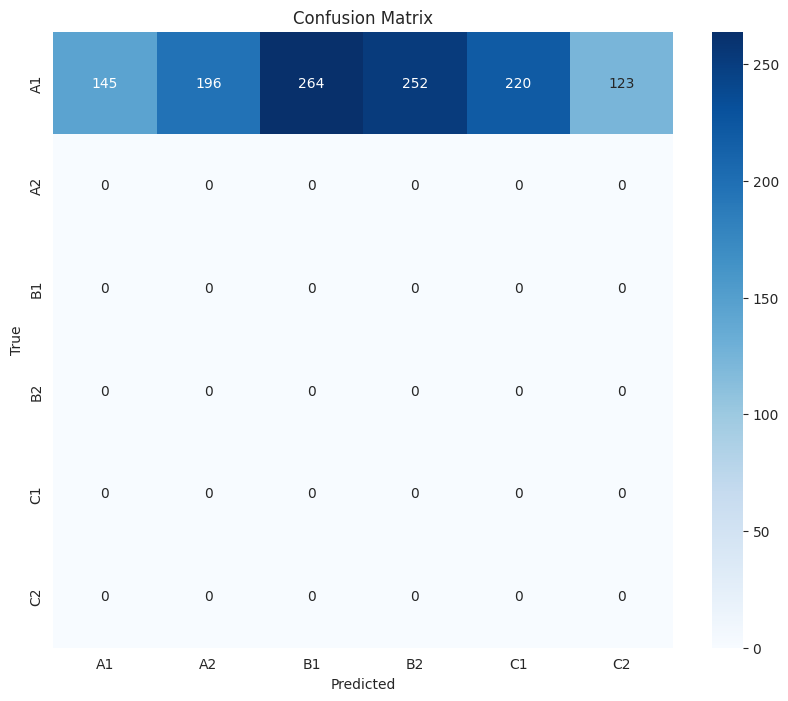

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions for the test set
final_model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        inputs, labels = batch
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        outputs = final_model(**inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)
label_names = label_encoder.classes_

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Find indices of incorrect predictions
incorrect_indices = [i for i in range(len(all_preds)) if all_preds[i] != all_labels[i]]

# Show some examples of erroneous predictions
num_examples = 10  # Number of examples to show
print("Examples of erroneous predictions:")
for i in incorrect_indices[:num_examples]:
    print(f"Sentence: {X_test[i]}")
    print(f"Predicted: {label_encoder.inverse_transform([all_preds[i]])[0]}")
    print(f"True: {label_encoder.inverse_transform([all_labels[i]])[0]}")
    print("----------")

In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(all_labels, all_preds, target_names=label_names)
print(report)

# Plot distribution of true labels vs predicted labels
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_labels, bins=len(label_names), alpha=0.7, label='True Labels')
plt.xticks(ticks=np.arange(len(label_names)), labels=label_names, rotation=90)
plt.title('Distribution of True Labels')

plt.subplot(1, 2, 2)
plt.hist(all_preds, bins=len(label_names), alpha=0.7, label='Predicted Labels', color='orange')
plt.xticks(ticks=np.arange(len(label_names)), labels=label_names, rotation=90)
plt.title('Distribution of Predicted Labels')

plt.show()

Let's try to build a **streamlit application**. It's better to adjust, based on the best model above. (I am not sure if it will work.)

In [ ]:
pip install streamlit transformers torch sklearn

In [ ]:
import streamlit as st
import torch
import torch.nn as nn
from transformers import CamembertTokenizer, CamembertModel
from torch.nn import functional as F
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import joblib  # Use joblib to save and load label encoder

# Load the trained model and tokenizer
class Net(nn.Module):
    def __init__(self, num_classes, dropout_rate):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(dropout_rate)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the model
model = Net(num_classes=3, dropout_rate=0.25)  # Adjust num_classes as needed
# model.load_state_dict(torch.load('path_to_your_model.pth', map_location=torch.device('cpu')))
model.eval()

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Load the label encoder
label_encoder = joblib.load('path_to_your_label_encoder.joblib')

def predict_difficulty(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=600)
    with torch.no_grad():
        outputs = model(**inputs)
        probabilities = F.softmax(outputs, dim=1)
        predicted_class = torch.argmax(probabilities, dim=1).item()
        confidence = probabilities[0][predicted_class].item()
    return label_encoder.inverse_transform([predicted_class])[0], confidence

# Streamlit application
st.title("Text Difficulty Prediction")
st.write("Enter a text and get its predicted difficulty level.")

text_input = st.text_area("Enter Text", "")

if st.button("Predict"):
    if text_input.strip():
        predicted_label, confidence = predict_difficulty(text_input)
        st.write(f"**Predicted Difficulty:** {predicted_label}")
        st.write(f"**Confidence:** {confidence:.2f}")

        st.write("### Additional Analysis")
        st.write("Here you could add more insights or visualizations based on the model's predictions.")
    else:
        st.write("Please enter some text to predict its difficulty.")

# Optional: Visualizations
st.write("### Distribution of Predictions")
# Add your code here to visualize predictions if you have a batch of texts to analyze

In [ ]:
streamlit run app.py

## Starting from scratch

Having reached 60%+ accuracy, I decided to spend some time trying to completely change the methodology.

As a first step, I decided to calculate the number of the words in the total corpus, then spreading them between different levels of difficulty. To create a final list of the words, I put two main conditions:
1. At least 70% of a specific word belongs to a certain level;
2. Removing Top-150 most popular words (usually it is stop words).

I was also thinking about lemmatization but decided that it can partially spoil results as the verb can be both in present simple and subjunctive  but it will have the same root.

*Below the main pieces of the code.*

In [ ]:
import pandas as pd
from collections import Counter
import string

# Load the dataset
data = df_train.copy()

# List of French stop words (a small subset for demonstration purposes)
french_stop_words = set([
    'au', 'aux', 'avec', 'ce', 'ces', 'dans', 'de', 'des', 'du', 'elle', 'en', 'et', 'eux', 'il', 'je', 'la', 'le',
    'leur', 'lui', 'ma', 'mais', 'me', 'même', 'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 'ou', 'par',
    'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 'un',
    'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés',
    'étant', 'suis', 'es', 'est', 'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 'serez', 'seront',
    'serais', 'serait', 'serions', 'seriez', 'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 'fus', 'fut',
    'fûmes', 'fûtes', 'furent', 'sois', 'soit', 'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 'fussions',
    'fussiez', 'fussent', 'ayant', 'ayante', 'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 'avons',
    'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 'aurez', 'auront', 'aurais', 'aurait', 'aurions', 'auriez',
    'auraient', 'avais', 'avait', 'avions', 'aviez', 'avaient', 'eut', 'eûmes', 'eûtes', 'eurent', 'aie', 'aies',
    'ait', 'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût', 'eussions', 'eussiez', 'eussent'
])

# Function to preprocess and count word frequency
def preprocess_and_count(sentences, stop_words):
    word_counts = Counter()

    for sentence in sentences:
        # Tokenize the sentence
        tokens = sentence.split()
        # Remove punctuation and stop words, and convert to lower case
        filtered_tokens = [
            word.lower().strip(string.punctuation)
            for word in tokens
            if word.lower().strip(string.punctuation) not in stop_words
        ]
        # Update word counts
        word_counts.update(filtered_tokens)

    return word_counts

# Apply the function to the dataset
word_counts_no_stopwords = preprocess_and_count(data['sentence'], french_stop_words)

# Convert to a DataFrame for better visualization
word_freq_df_no_stopwords = pd.DataFrame(word_counts_no_stopwords.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

# Display the DataFrame
print(word_freq_df_no_stopwords.head(10))

      Word  Frequency
0      les       2027
140              1051
182      a        540
195   plus        424
24   c'est        299
88   comme        288
310  cette        269
477     si        218
331   tout        209
512    ils        188


In [ ]:
words = word_freq_df_no_stopwords.iloc[150:].reset_index(drop=True)

In [ ]:
words.head(3)

,Word,Frequency
0,effet,33
1,point,33
2,livre,32


In [ ]:
import pandas as pd
import string

words_df = words

# Initialize the new columns for levels A1 to C2
levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']
for level in levels:
    words_df[level] = 0

# Function to count word occurrences per level
def count_words_per_level(sentences, levels, word):
    level_counts = {level: 0 for level in levels}

    for level, sentence in sentences.itertuples(index=False):
        tokens = sentence.split()
        filtered_tokens = [w.lower().strip(string.punctuation) for w in tokens]
        level_counts[level] += filtered_tokens.count(word.lower())

    return level_counts

# Apply the counting function to each word in the words_df
for index, row in words_df.iterrows():
    word = row['Word']
    level_counts = count_words_per_level(df_train[['difficulty', 'sentence']], levels, word)
    for level in levels:
        words_df.at[index, level] = level_counts[level]

# Display the updated DataFrame
print(words_df.head(10))

       Word  Frequency  A1  A2  B1  B2  C1  C2
0     effet         33   0   1   3   6  11  12
1     point         33   0   0   3   3  13  14
2     livre         32   5   5   3   9   6   4
3      père         32   2   5   6   4   1  14
4       cas         32   0   6   5   7   6   8
5  nouvelle         32   2  13   5   6   6   0
6    milieu         32   0   1   2   6   9  14
7      fête         32   3  12   7   8   1   1
8    partie         32   3   2   8   7   5   7
9       ici         32   7   7   6   1   4   7


In [ ]:
# Levels
levels = ['A1', 'A2', 'B1', 'B2', 'C1', 'C2']

# Calculate the total occurrences for each word
words_df['Total'] = words_df[levels].sum(axis=1)

# Create a new list "meaningful_words" with dictionaries
meaningful_words = []

# Determine the words that belong to a certain level more than 70% of the time
threshold = 0.7

for index, row in words_df.iterrows():
    for level in levels:
        if row[level] / row['Total'] > threshold:
            meaningful_words.append({'Word': row['Word'], 'Level': level})
            break

# Convert the list of dictionaries to a DataFrame
meaningful_words_df = pd.DataFrame(meaningful_words)

# Display the new DataFrame
print(meaningful_words_df)

                 Word Level
0              j'aime    A1
1             déchets    B2
2             marquis    C1
3               sorte    C2
4            ellénore    C2
...               ...   ...
10965       éternelle    C1
10966      inévitable    C1
10967  d'arrache-pied    B2
10968          gratté    A1
10969        étouffée    C2

[10970 rows x 2 columns]


Although, there are some exceptions for some words (like gratté), mainly it produced interesting results.

In [ ]:
# Count the number of words per level
word_counts_per_level = meaningful_words_df['Level'].value_counts()
print(word_counts_per_level)

Level
C2    4297
C1    3015
B2    2011
B1     882
A2     470
A1     295
Name: count, dtype: int64


In [ ]:
meaningful_words_df.to_csv('meaningful_words_df.csv', index=False)
from google.colab import files
files.download('meaningful_words_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

As a next step, I decided to check different quantitative characteristics:
1. The average length of the sentence for each difficulty level;
2. The average number of words in the sentence for each difficulty level;
3. The average number of apostrophes in the sentence for each difficulty level;
4. The average number of punctuation marks in the sentence for each difficulty level.

In the future this list can be continued and include different words and features of the words/sentences/levels.

In [ ]:
data = df_train.copy()

# Calculate the length of each sentence
data['sentence_length'] = data['sentence'].apply(len)

# Calculate the average length of the sentence for each difficulty level
average_length_by_difficulty = data.groupby('difficulty')['sentence_length'].mean().reset_index()

# Display the results
import ace_tools as tools; tools.display_dataframe_to_user(name="Average Sentence Length by Difficulty", dataframe=average_length_by_difficulty)

average_length_by_difficulty

In [ ]:
# Calculate the number of words in each sentence
data['word_count'] = data['sentence'].apply(lambda x: len(x.split()))

# Calculate the average number of words in the sentence for each difficulty level
average_word_count_by_difficulty = data.groupby('difficulty')['word_count'].mean().reset_index()

# Display the results
tools.display_dataframe_to_user(name="Average Word Count by Difficulty", dataframe=average_word_count_by_difficulty)

average_word_count_by_difficulty

In [ ]:
# Calculate the number of apostrophes in each sentence
data['apostrophe_count'] = data['sentence'].apply(lambda x: x.count("'"))

# Calculate the average number of apostrophes in the sentence for each difficulty level
average_apostrophe_count_by_difficulty = data.groupby('difficulty')['apostrophe_count'].mean().reset_index()

# Display the results
tools.display_dataframe_to_user(name="Average Apostrophe Count by Difficulty", dataframe=average_apostrophe_count_by_difficulty)

average_apostrophe_count_by_difficulty

In [ ]:
import string

# Define the punctuation marks
punctuation_marks = string.punctuation

# Calculate the number of punctuation marks in each sentence
data['punctuation_count'] = data['sentence'].apply(lambda x: sum(1 for char in x if char in punctuation_marks))

# Calculate the average number of punctuation marks in the sentence for each difficulty level
average_punctuation_count_by_difficulty = data.groupby('difficulty')['punctuation_count'].mean().reset_index()

# Display the results
tools.display_dataframe_to_user(name="Average Punctuation Count by Difficulty", dataframe=average_punctuation_count_by_difficulty)

average_punctuation_count_by_difficulty

In [ ]:
# Merge the datasets based on the difficulty level
combined_data = average_length_by_difficulty.merge(
    average_word_count_by_difficulty, on='difficulty').merge(
    average_apostrophe_count_by_difficulty, on='difficulty').merge(
    average_punctuation_count_by_difficulty, on='difficulty')

# Display the combined results
tools.display_dataframe_to_user(name="Combined Indicators by Difficulty", dataframe=combined_data)

combined_data

It's time to test some models, based on these characteristics.

However, the results were quite modest: around 28-30%, based on the words, and around 42%, adding quantitative characteristics.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import re

# Load datasets
training_data = df_train.copy()
indicators_by_difficulty = comb_dif.copy()
meaningful_words_df = minif_words.copy()
unlabelled_test_data = df_test.copy()

# Function to extract features from sentences
def extract_features(df):
    df['sentence_length'] = df['sentence'].apply(len)
    df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
    df['apostrophe_count'] = df['sentence'].apply(lambda x: x.count("'"))
    df['punctuation_count'] = df['sentence'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
    return df

# Extract features for training data
training_data = extract_features(training_data)

# Map word difficulties to their levels
word_difficulty_map = meaningful_words_df.set_index('Word')['Level'].to_dict()

def word_difficulty_features(sentence):
    words = sentence.split()
    levels = [word_difficulty_map.get(word, 'unknown') for word in words]
    level_counts = pd.Series(levels).value_counts().to_dict()
    return level_counts

# Add word difficulty features to training data
difficulty_levels = meaningful_words_df['Level'].unique()
for level in difficulty_levels:
    training_data[level] = training_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Encode target variable
difficulty_mapping = {'A1': 1, 'A2': 2, 'B1': 3, 'B2': 4, 'C1': 5, 'C2': 6}
training_data['difficulty'] = training_data['difficulty'].map(difficulty_mapping)

# Prepare feature set and target variable
X = training_data.drop(columns=['id', 'sentence', 'difficulty'])
y = training_data['difficulty']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred, target_names=difficulty_mapping.keys()))

# Extract features for unlabelled test data
unlabelled_test_data = extract_features(unlabelled_test_data)
for level in difficulty_levels:
    unlabelled_test_data[level] = unlabelled_test_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Predict difficulty levels for the unlabelled test data
X_test = unlabelled_test_data.drop(columns=['id', 'sentence'])
unlabelled_test_data['predicted_difficulty'] = clf.predict(X_test)

# Map predicted difficulty levels back to labels
inverse_difficulty_mapping = {v: k for k, v in difficulty_mapping.items()}
unlabelled_test_data['predicted_difficulty'] = unlabelled_test_data['predicted_difficulty'].map(inverse_difficulty_mapping)

# Show a sample of the predictions
unlabelled_test_sample = unlabelled_test_data[['id', 'sentence', 'predicted_difficulty']].head()
unlabelled_test_sample

              precision    recall  f1-score   support

          A1       0.67      0.73      0.70       166
          A2       0.63      0.62      0.63       158
          B1       0.79      0.71      0.75       166
          B2       0.84      0.88      0.86       153
          C1       0.91      0.91      0.91       152
          C2       0.94      0.93      0.94       165

    accuracy                           0.80       960
   macro avg       0.80      0.80      0.80       960
weighted avg       0.80      0.80      0.80       960



,id,sentence,predicted_difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,C2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",B1
3,3,"Ce n'est pas étonnant, car c'est une saison my...",B2
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2


In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import classification_report
import torch
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from datasets import Dataset as HFDataset, ClassLabel

# Load datasets
training_data = df_train.copy()
indicators_by_difficulty = comb_dif.copy()
meaningful_words_df = minif_words.copy()
unlabelled_test_data = df_test.copy()

# Define difficulty mapping
difficulty_mapping = {'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}
inverse_difficulty_mapping = {v: k for k, v in difficulty_mapping.items()}

# Function to extract features from sentences
def extract_features(df):
    df['sentence_length'] = df['sentence'].apply(len)
    df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
    df['apostrophe_count'] = df['sentence'].apply(lambda x: x.count("'"))
    df['punctuation_count'] = df['sentence'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
    return df

# Extract features for training data
training_data = extract_features(training_data)

# Map word difficulties to their levels
word_difficulty_map = meaningful_words_df.set_index('Word')['Level'].to_dict()

def word_difficulty_features(sentence):
    words = sentence.split()
    levels = [word_difficulty_map.get(word, 'unknown') for word in words]
    level_counts = pd.Series(levels).value_counts().to_dict()
    return level_counts

# Add word difficulty features to training data
difficulty_levels = meaningful_words_df['Level'].unique()
for level in difficulty_levels:
    training_data[level] = training_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Encode target variable
training_data['difficulty'] = training_data['difficulty'].map(difficulty_mapping)

# Convert data to Hugging Face Dataset
dataset = HFDataset.from_pandas(training_data[['sentence', 'difficulty']])

# Convert difficulty back to string
dataset = dataset.map(lambda example: {'difficulty': inverse_difficulty_mapping[example['difficulty']]})

# Convert difficulty to ClassLabel
class_label = ClassLabel(num_classes=len(difficulty_mapping), names=list(difficulty_mapping.keys()))
dataset = dataset.map(lambda example: {'label': class_label.str2int(example['difficulty'])})
dataset = dataset.remove_columns(['difficulty'])
dataset = dataset.rename_column('label', 'labels')

# Split dataset
dataset = dataset.train_test_split(test_size=0.1)

# Tokenize data
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

def tokenize_function(examples):
    return tokenizer(examples['sentence'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(['sentence'])
tokenized_datasets.set_format('torch')

# Load model
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=len(difficulty_mapping))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    learning_rate=1.75e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    #weight_decay=0.01,
)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

# Train model
trainer.train()

# Evaluate model
predictions = trainer.predict(tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)
print(classification_report(tokenized_datasets['test']['labels'], preds, target_names=[inverse_difficulty_mapping[i] for i in range(len(difficulty_mapping))]))

# Process unlabelled test data
unlabelled_test_data = extract_features(unlabelled_test_data)
for level in difficulty_levels:
    unlabelled_test_data[level] = unlabelled_test_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Tokenize unlabelled test data
unlabelled_dataset = HFDataset.from_pandas(unlabelled_test_data)
unlabelled_tokenized_dataset = unlabelled_dataset.map(tokenize_function, batched=True)
unlabelled_tokenized_dataset = unlabelled_tokenized_dataset.remove_columns(['sentence'])
unlabelled_tokenized_dataset.set_format('torch')

# Predict difficulty levels for the unlabelled test data
test_predictions = trainer.predict(unlabelled_tokenized_dataset)
test_preds = np.argmax(test_predictions.predictions, axis=1)
unlabelled_test_data['predicted_difficulty'] = [inverse_difficulty_mapping[i] for i in test_preds]

# Show a sample of the predictions
unlabelled_test_sample = unlabelled_test_data[['id', 'sentence', 'predicted_difficulty']].head()
unlabelled_test_sample

submission2 = unlabelled_test_data[['id', 'predicted_difficulty']]
submission2.to_csv('know_how2.csv', index=False)
from google.colab import files
files.download('know_how2.csv')

After this fail, I tried to add the camembert - the result became better (52-53%), but still not good enough.

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.metrics import classification_report
import torch
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset
from datasets import Dataset as HFDataset, ClassLabel

# Load datasets
training_data = df_train.copy()
indicators_by_difficulty = comb_dif.copy()
meaningful_words_df = minif_words.copy()
unlabelled_test_data = df_test.copy()

# Define difficulty mapping
difficulty_mapping = {'A1': 0, 'A2': 1, 'B1': 2, 'B2': 3, 'C1': 4, 'C2': 5}
inverse_difficulty_mapping = {v: k for k, v in difficulty_mapping.items()}

# Function to extract features from sentences
def extract_features(df):
    df['sentence_length'] = df['sentence'].apply(len)
    df['word_count'] = df['sentence'].apply(lambda x: len(x.split()))
    df['apostrophe_count'] = df['sentence'].apply(lambda x: x.count("'"))
    df['punctuation_count'] = df['sentence'].apply(lambda x: len(re.findall(r'[^\w\s]', x)))
    return df

# Extract features for training data
training_data = extract_features(training_data)

# Map word difficulties to their levels
word_difficulty_map = meaningful_words_df.set_index('Word')['Level'].to_dict()

def word_difficulty_features(sentence):
    words = sentence.split()
    levels = [word_difficulty_map.get(word, 'unknown') for word in words]
    level_counts = pd.Series(levels).value_counts().to_dict()
    return level_counts

# Add word difficulty features to training data
difficulty_levels = meaningful_words_df['Level'].unique()
for level in difficulty_levels:
    training_data[level] = training_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Encode target variable
training_data['difficulty'] = training_data['difficulty'].map(difficulty_mapping)

# Convert data to Hugging Face Dataset
dataset = HFDataset.from_pandas(training_data[['sentence', 'difficulty']])

# Convert difficulty back to string
dataset = dataset.map(lambda example: {'difficulty': inverse_difficulty_mapping[example['difficulty']]})

# Convert difficulty to ClassLabel
class_label = ClassLabel(num_classes=len(difficulty_mapping), names=list(difficulty_mapping.keys()))
dataset = dataset.map(lambda example: {'label': class_label.str2int(example['difficulty'])})
dataset = dataset.remove_columns(['difficulty'])
dataset = dataset.rename_column('label', 'labels')

# Split dataset
dataset = dataset.train_test_split(test_size=0.1)

# Tokenize data
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

def tokenize_function(examples):
    return tokenizer(examples['sentence'], padding='max_length', truncation=True)

tokenized_datasets = dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.remove_columns(['sentence'])
tokenized_datasets.set_format('torch')

# Load model
model = CamembertForSequenceClassification.from_pretrained('camembert-base', num_labels=len(difficulty_mapping))

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    learning_rate=1.75e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    load_best_model_at_end=True,
    metric_for_best_model='eval_loss',
    greater_is_better=False,
)

# Define early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=1)

# Define trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    callbacks=[early_stopping_callback]
)

# Train model
trainer.train()

# Evaluate model
predictions = trainer.predict(tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)
print(classification_report(tokenized_datasets['test']['labels'], preds, target_names=[inverse_difficulty_mapping[i] for i in range(len(difficulty_mapping))]))

# Process unlabelled test data
unlabelled_test_data = extract_features(unlabelled_test_data)
for level in difficulty_levels:
    unlabelled_test_data[level] = unlabelled_test_data['sentence'].apply(lambda x: word_difficulty_features(x).get(level, 0))

# Tokenize unlabelled test data
unlabelled_dataset = HFDataset.from_pandas(unlabelled_test_data)
unlabelled_tokenized_dataset = unlabelled_dataset.map(tokenize_function, batched=True)
unlabelled_tokenized_dataset = unlabelled_tokenized_dataset.remove_columns(['sentence'])
unlabelled_tokenized_dataset.set_format('torch')

# Predict difficulty levels for the unlabelled test data
test_predictions = trainer.predict(unlabelled_tokenized_dataset)
test_preds = np.argmax(test_predictions.predictions, axis=1)
unlabelled_test_data['predicted_difficulty'] = [inverse_difficulty_mapping[i] for i in test_preds]

# Show a sample of the predictions
unlabelled_test_sample = unlabelled_test_data[['id', 'sentence', 'predicted_difficulty']].head()
unlabelled_test_sample

Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

Map:   0%|          | 0/4800 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Map:   0%|          | 0/4320 [00:00<?, ? examples/s]

Map:   0%|          | 0/480 [00:00<?, ? examples/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.411700,1.256848
2,1.043900,1.137318
3,0.853300,1.271539


              precision    recall  f1-score   support

          A1       0.64      0.74      0.69        73
          A2       0.49      0.60      0.54        78
          B1       0.58      0.39      0.47        94
          B2       0.40      0.60      0.48        72
          C1       0.45      0.23      0.30        92
          C2       0.57      0.65      0.61        71

    accuracy                           0.52       480
   macro avg       0.52      0.53      0.51       480
weighted avg       0.52      0.52      0.50       480



Map:   0%|          | 0/1200 [00:00<?, ? examples/s]

,id,sentence,predicted_difficulty
0,0,Nous dûmes nous excuser des propos que nous eû...,C2
1,1,Vous ne pouvez pas savoir le plaisir que j'ai ...,A2
2,2,"Et, paradoxalement, boire froid n'est pas la b...",B1
3,3,"Ce n'est pas étonnant, car c'est une saison my...",A2
4,4,"Le corps de Golo lui-même, d'une essence aussi...",C2


In [ ]:
submission2 = unlabelled_test_data[['id', 'predicted_difficulty']]
submission2.to_csv('know_how2_b8.csv', index=False)
from google.colab import files
files.download('know_how2_b8.csv')

# Appendix

## Appendix - Full Bert

**Model 1.** Accuracy: 0.562

Key parameters:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch")

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.2
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.267100,1.374169
2,1.070300,1.230954
3,0.711700,1.169585
4,0.464900,1.659990
5,0.033800,2.051420


Validation Accuracy: 0.5645833333333333


In [ ]:
submission.to_csv('sample_B.csv', index=False)
from google.colab import files
files.download('sample_B.csv')

**Model 2**

Key parameters:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.001,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch")

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.2
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.001,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.313300,1.238763
2,1.000600,1.176991
3,0.947300,1.135223
4,0.493400,1.289233
5,0.486400,1.745724


Validation Accuracy: 0.5447916666666667


**Model 3**

Key parameters:

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate = 2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch")

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=150):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=4,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate = 2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_FB_b8_wd001_lr2e5.csv', index=False)
from google.colab import files
files.download('sample_FB_b8_wd001_lr2e5.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.305400,1.150795
2,1.044300,1.081923
3,0.582200,1.060861
4,0.554500,1.224713


Validation Accuracy: 0.5645833333333333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Other models**

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=150):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.1,
    learning_rate = 2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_FB_b8_wd01_lr2e5.csv', index=False)
from google.colab import files
files.download('sample_FB_b8_wd01_lr2e5.csv')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.249100,1.204081
2,1.041000,1.077007
3,0.899200,1.184270
4,0.638100,1.349510
5,0.341100,1.482497


Validation Accuracy: 0.5541666666666667


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=150):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=500,
    weight_decay=0.005,
    learning_rate = 2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_FB_b8_wd0005_lr2e5.csv', index=False)
from google.colab import files
files.download('sample_FB_b8_wd0005_lr2e5.csv')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.250000,1.247621
2,1.070300,1.098368
3,0.904100,1.182353
4,0.629800,1.358626


KeyboardInterrupt: 

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=150):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=6,
    warmup_steps=500,
    weight_decay=0.01,
    learning_rate = 2e-5,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_FB_b6_wd001_lr2e5.csv', index=False)
from google.colab import files
files.download('sample_FB_b6_wd001_lr2e5.csv')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.127800,1.163018
2,0.958200,1.060712
3,0.773700,1.269080
4,0.611500,1.482649
5,0.400200,1.739673


Validation Accuracy: 0.5833333333333334


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Load your data
data = df_train
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
bert_model = BertModel.from_pretrained('bert-base-multilingual-cased')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.bert = bert_model
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(5):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_fromDC_sameAScamerbert.csv', index=False)
from google.colab import files
files.download('sample_fromDC_sameAScamerbert.csv')

Epoch 1
-------------------------------


TypeError: Net.forward() got an unexpected keyword argument 'token_type_ids'

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'],
    training_data['encoded_labels'],
    test_size=0.1
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=800,
    weight_decay=0.1,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_FB_wc800_wd01.csv', index=False)
from google.colab import files
files.download('sample_FB_wc800_wd01.csv')

In [ ]:
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, MarianMTModel, MarianTokenizer
from torch.utils.data import Dataset

# Load data
training_data = df_train
test_data = df_test

# Initialize tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Back translation for data augmentation
def back_translate(sentences, src_lang="en", tgt_lang="fr"):
    src_tokenizer = MarianTokenizer.from_pretrained(f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}')
    tgt_tokenizer = MarianTokenizer.from_pretrained(f'Helsinki-NLP/opus-mt-{tgt_lang}-{src_lang}')
    src_model = MarianMTModel.from_pretrained(f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}')
    tgt_model = MarianMTModel.from_pretrained(f'Helsinki-NLP/opus-mt-{tgt_lang}-{src_lang}')

    augmented_sentences = []
    for sentence in sentences:
        # Translate to target language
        encoded = src_tokenizer(sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
        translated = src_model.generate(**encoded)
        tgt_sentence = src_tokenizer.batch_decode(translated, skip_special_tokens=True)[0]

        # Translate back to source language
        encoded = tgt_tokenizer(tgt_sentence, return_tensors='pt', padding=True, truncation=True, max_length=512)
        back_translated = tgt_model.generate(**encoded)
        src_sentence = tgt_tokenizer.batch_decode(back_translated, skip_special_tokens=True)[0]

        augmented_sentences.append(src_sentence)

    return augmented_sentences

# Perform back translation on the training sentences
augmented_sentences = back_translate(training_data['sentence'].tolist())
augmented_labels = training_data['difficulty'].tolist()

# Append the augmented data to the original data
training_data_augmented = training_data.copy()
training_data_augmented = training_data_augmented.append(pd.DataFrame({'sentence': augmented_sentences, 'difficulty': augmented_labels}), ignore_index=True)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data_augmented['difficulty'].unique())}
training_data_augmented['encoded_labels'] = training_data_augmented['difficulty'].map(label_dict)

# Split data into training and validation sets
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data_augmented['sentence'],
    training_data_augmented['encoded_labels'],
    test_size=0.2,
    random_state=42
)

# Tokenization and dataset preparation
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=128):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings['input_ids'])

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts.tolist(), train_labels.tolist())
val_dataset = FrenchTextDataset(val_texts.tolist(), val_labels.tolist())

# Load pretrained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=5,
    per_device_train_batch_size=6,
    per_device_eval_batch_size=12,
    warmup_steps=500,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=10,
    evaluation_strategy="epoch"
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset
)

# Train the model
trainer.train()

# Prediction on validation data for evaluation
outputs = trainer.predict(val_dataset)
val_preds = np.argmax(outputs.predictions, axis=-1)
val_accuracy = accuracy_score(val_labels, val_preds)
print("Validation Accuracy:", val_accuracy)

# Prepare test data and predict
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

# Save the submission file
submission.to_csv('sample_b_tr.csv', index=False)
from google.colab import files
files.download('sample_b_tr.csv')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/778k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.34M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/301M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

KeyboardInterrupt: 

## Appendix - French Bert

**Model 1.** Accuracy - 57.9

It is the same model from the best Camembert result but with nn.Dropout - 0.2.

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.2)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr3e5_e4_drop02.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr3e5_e4_drop02.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.768519  [    0/ 8640]
loss: 1.777880  [   80/ 8640]
loss: 1.803201  [  160/ 8640]
loss: 1.749476  [  240/ 8640]
loss: 1.717174  [  320/ 8640]
loss: 1.757003  [  400/ 8640]
loss: 1.700055  [  480/ 8640]
loss: 1.604457  [  560/ 8640]
loss: 1.489173  [  640/ 8640]
loss: 1.650767  [  720/ 8640]
loss: 1.559480  [  800/ 8640]
loss: 1.668092  [  880/ 8640]
loss: 1.417057  [  960/ 8640]
loss: 1.497578  [ 1040/ 8640]
loss: 1.345356  [ 1120/ 8640]
loss: 1.195809  [ 1200/ 8640]
loss: 1.222228  [ 1280/ 8640]
loss: 1.297692  [ 1360/ 8640]
loss: 1.425284  [ 1440/ 8640]
loss: 1.387073  [ 1520/ 8640]
loss: 1.333253  [ 1600/ 8640]
loss: 1.411439  [ 1680/ 8640]
loss: 1.251545  [ 1760/ 8640]
loss: 1.269686  [ 1840/ 8640]
loss: 1.402421  [ 1920/ 8640]
loss: 1.117135  [ 2000/ 8640]
loss: 1.172135  [ 2080/ 8640]
loss: 1.179394  [ 2160/ 8640]
loss: 1.420729  [ 2240/ 8640]
loss: 1.257098  [ 2320/ 8640]
loss: 1.291638  [ 2400/ 8640]
loss: 1.044386  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Other models**

*(Their real accuracy can be checked on the Kaggle.)* Mainly, I focus with **nltk**.

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1.75e-5, weight_decay=0.1)

# Early stopping parameters
early_stopping_patience = 1
best_loss = float('inf')
patience_counter = 0

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(10):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    val_loss = compute_accuracy(test_loader, model)
    print(f"Validation loss: {val_loss:.2f}")

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Save the model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

# Load the best model
#model.load_state_dict(torch.load('best_model.pth'))

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Further processing for generating predictions and submission remains the same...
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01_wd01.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01_wd01.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Epoch 1
-------------------------------
loss: 1.806043  [    0/ 8640]
loss: 1.804136  [   80/ 8640]
loss: 1.762988  [  160/ 8640]
loss: 1.821134  [  240/ 8640]
loss: 1.768228  [  320/ 8640]
loss: 1.756873  [  400/ 8640]
loss: 1.748500  [  480/ 8640]
loss: 1.699681  [  560/ 8640]
loss: 1.646486  [  640/ 8640]
loss: 1.692441  [  720/ 8640]
loss: 1.576208  [  800/ 8640]
loss: 1.631260  [  880/ 8640]
loss: 1.418647  [  960/ 8640]
loss: 1.607756  [ 1040/ 8640]
loss: 1.476603  [ 1120/ 8640]
loss: 1.633927  [ 1200/ 8640]
loss: 1.547223  [ 1280/ 8640]
loss: 1.538892  [ 1360/ 8640]
loss: 1.598789  [ 1440/ 8640]
loss: 1.305871  [ 1520/ 8640]
loss: 1.214934  [ 1600/ 8640]
loss: 1.470122  [ 1680/ 8640]
loss: 1.497276  [ 1760/ 8640]
loss: 1.596928  [ 1840/ 8640]
loss: 1.367312  [ 1920/ 8640]
loss: 1.259271  [ 2000/ 8640]
loss: 1.382690  [ 2080/ 8640]
loss: 1.375529  [ 2160/ 8640]
loss: 1.107187  [ 2240/ 8640]
loss: 1.474723  [ 2320/ 8640]
loss: 1.186127  [ 2400/ 8640]
loss: 1.325468  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1.75e-5, weight_decay=0.05)

# Early stopping parameters
early_stopping_patience = 1
best_loss = float('inf')
patience_counter = 0

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(10):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    val_loss = compute_accuracy(test_loader, model)
    print(f"Validation loss: {val_loss:.2f}")

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Save the model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

# Load the best model
#model.load_state_dict(torch.load('best_model.pth'))

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Further processing for generating predictions and submission remains the same...
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01_wd005.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01_wd005.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.784604  [    0/ 8640]
loss: 1.783562  [   80/ 8640]
loss: 1.782790  [  160/ 8640]
loss: 1.791610  [  240/ 8640]
loss: 1.737871  [  320/ 8640]
loss: 1.794748  [  400/ 8640]
loss: 1.759478  [  480/ 8640]
loss: 1.708128  [  560/ 8640]
loss: 1.709434  [  640/ 8640]
loss: 1.703352  [  720/ 8640]
loss: 1.648378  [  800/ 8640]
loss: 1.637098  [  880/ 8640]
loss: 1.668722  [  960/ 8640]
loss: 1.471904  [ 1040/ 8640]
loss: 1.524548  [ 1120/ 8640]
loss: 1.542871  [ 1200/ 8640]
loss: 1.490619  [ 1280/ 8640]
loss: 1.386975  [ 1360/ 8640]
loss: 1.389264  [ 1440/ 8640]
loss: 1.563174  [ 1520/ 8640]
loss: 1.457448  [ 1600/ 8640]
loss: 1.595213  [ 1680/ 8640]
loss: 1.287173  [ 1760/ 8640]
loss: 1.390197  [ 1840/ 8640]
loss: 1.600583  [ 1920/ 8640]
loss: 1.347261  [ 2000/ 8640]
loss: 1.258888  [ 2080/ 8640]
loss: 1.322496  [ 2160/ 8640]
loss: 1.269006  [ 2240/ 8640]
loss: 1.250496  [ 2320/ 8640]
loss: 1.841937  [ 2400/ 8640]
loss: 1.247155  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1.75e-5, weight_decay=0.15)

# Early stopping parameters
early_stopping_patience = 1
best_loss = float('inf')
patience_counter = 0

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(10):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    val_loss = compute_accuracy(test_loader, model)
    print(f"Validation loss: {val_loss:.2f}")

    # Check for early stopping
    if val_loss < best_loss:
        best_loss = val_loss
        patience_counter = 0
        # Save the model
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        patience_counter += 1
        if patience_counter >= early_stopping_patience:
            print("Early stopping triggered")
            break

# Load the best model
#model.load_state_dict(torch.load('best_model.pth'))

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Further processing for generating predictions and submission remains the same...
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01_wd015.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01_wd015.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.798753  [    0/ 8640]
loss: 1.747671  [   80/ 8640]
loss: 1.749572  [  160/ 8640]
loss: 1.733417  [  240/ 8640]
loss: 1.800035  [  320/ 8640]
loss: 1.789371  [  400/ 8640]
loss: 1.718962  [  480/ 8640]
loss: 1.686798  [  560/ 8640]
loss: 1.642476  [  640/ 8640]
loss: 1.639246  [  720/ 8640]
loss: 1.652835  [  800/ 8640]
loss: 1.665615  [  880/ 8640]
loss: 1.588026  [  960/ 8640]
loss: 1.440770  [ 1040/ 8640]
loss: 1.342685  [ 1120/ 8640]
loss: 1.487931  [ 1200/ 8640]
loss: 1.434970  [ 1280/ 8640]
loss: 1.629258  [ 1360/ 8640]
loss: 1.273824  [ 1440/ 8640]
loss: 1.372522  [ 1520/ 8640]
loss: 1.150522  [ 1600/ 8640]
loss: 1.369034  [ 1680/ 8640]
loss: 1.531774  [ 1760/ 8640]
loss: 1.754651  [ 1840/ 8640]
loss: 1.164102  [ 1920/ 8640]
loss: 1.445399  [ 2000/ 8640]
loss: 1.292204  [ 2080/ 8640]
loss: 1.528812  [ 2160/ 8640]
loss: 1.291221  [ 2240/ 8640]
loss: 1.054811  [ 2320/ 8640]
loss: 1.016702  [ 2400/ 8640]
loss: 1.098799  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from transformers import CamembertTokenizer, CamembertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.749e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01_new.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01_new.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.783658  [    0/ 8640]
loss: 1.811606  [   80/ 8640]
loss: 1.832079  [  160/ 8640]
loss: 1.768653  [  240/ 8640]
loss: 1.772610  [  320/ 8640]
loss: 1.742198  [  400/ 8640]
loss: 1.806882  [  480/ 8640]
loss: 1.769136  [  560/ 8640]
loss: 1.681716  [  640/ 8640]
loss: 1.629272  [  720/ 8640]
loss: 1.565492  [  800/ 8640]
loss: 1.584505  [  880/ 8640]
loss: 1.603585  [  960/ 8640]
loss: 1.581653  [ 1040/ 8640]
loss: 1.687155  [ 1120/ 8640]
loss: 1.478335  [ 1200/ 8640]
loss: 1.298736  [ 1280/ 8640]
loss: 1.552001  [ 1360/ 8640]
loss: 1.426776  [ 1440/ 8640]
loss: 1.493022  [ 1520/ 8640]
loss: 1.502383  [ 1600/ 8640]
loss: 1.196475  [ 1680/ 8640]
loss: 1.353438  [ 1760/ 8640]
loss: 1.283953  [ 1840/ 8640]
loss: 1.300572  [ 1920/ 8640]
loss: 1.387003  [ 2000/ 8640]
loss: 1.231985  [ 2080/ 8640]
loss: 1.535987  [ 2160/ 8640]
loss: 1.410243  [ 2240/ 8640]
loss: 1.279744  [ 2320/ 8640]
loss: 1.042958  [ 2400/ 8640]
loss: 1.167870  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Trying embeddings

First, I tried a few models with the back translation technique. However, it required a lot computational power and didn't process.

In [ ]:
import pandas as pd
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

# Load the dataset
df = df_test

# Load the mBART model and tokenizer
model_name = 'facebook/mbart-large-50-many-to-many-mmt'
tokenizer = MBart50TokenizerFast.from_pretrained(model_name)
model = MBartForConditionalGeneration.from_pretrained(model_name)

# Set the language codes
tokenizer.src_lang = "fr_XX"
target_lang = "en_XX"

def translate_to_russian(sentence, tokenizer, model):
    # Tokenize and prepare the text for translation
    inputs = tokenizer(sentence, return_tensors='pt')

    # Generate translation
    translated_tokens = model.generate(**inputs, forced_bos_token_id=tokenizer.lang_code_to_id[target_lang])

    # Decode the translation
    translated_sentence = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
    return translated_sentence

# Apply translation to the dataset
df['translated_sentence'] = df['sentence'].apply(lambda x: translate_to_russian(x, tokenizer, model))

# Save the new dataset

print("Translation completed and saved to 'translated_data.csv'.")

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from translate import Translator

# Load the dataset
df = df_test


# Initialize the translator
translator = Translator(to_lang="en", from_lang="fr")

# Define a function to translate sentences
def translate_sentence(sentence):
    try:
        translation = translator.translate(sentence)
        return translation
    except Exception as e:
        print(f"Error translating sentence '{sentence}': {e}")
        return None

# Apply the translation function to the dataset
df['translated_sentence'] = df['sentence'].apply(translate_sentence)

# Save the new dataset with translations


print("Translation completed and saved to 'translated_dataset.csv'.")

KeyboardInterrupt: 

In [ ]:
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load the dataset
df = df_test

# Load the T5 model and tokenizer
model_name = 'google/t5-small-ssm-nq'
tokenizer = T5Tokenizer.from_pretrained(model_name)
model = T5ForConditionalGeneration.from_pretrained(model_name)

def translate_to_russian(sentence, tokenizer, model):
    # Prepare the text for translation
    inputs = tokenizer.encode(f'translate French to Russian: {sentence}', return_tensors='pt')

    # Generate translation
    outputs = model.generate(inputs)

    # Decode the translation
    translated_sentence = tokenizer.decode(outputs[0], skip_special_tokens=True)
    return translated_sentence

# Apply the translation function to the dataset
df['translated_sentence'] = df['sentence'].apply(lambda x: translate_to_russian(x, tokenizer, model))

# Save the new dataset


print("Translation completed and saved to 'translated_data.csv'.")

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1141: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Translation completed and saved to 'translated_data.csv'.


In [ ]:
# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=4e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr4e5_e4.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr4e5_e4.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.786511  [    0/ 8640]
loss: 1.807472  [   80/ 8640]
loss: 1.779651  [  160/ 8640]
loss: 1.716003  [  240/ 8640]
loss: 1.640763  [  320/ 8640]
loss: 1.626217  [  400/ 8640]
loss: 1.540816  [  480/ 8640]
loss: 1.529840  [  560/ 8640]
loss: 1.423571  [  640/ 8640]
loss: 1.516129  [  720/ 8640]
loss: 1.412546  [  800/ 8640]
loss: 1.061795  [  880/ 8640]
loss: 1.108844  [  960/ 8640]
loss: 1.408844  [ 1040/ 8640]
loss: 1.263089  [ 1120/ 8640]
loss: 1.420491  [ 1200/ 8640]
loss: 1.187398  [ 1280/ 8640]
loss: 1.523376  [ 1360/ 8640]
loss: 1.099955  [ 1440/ 8640]
loss: 1.233220  [ 1520/ 8640]
loss: 1.408776  [ 1600/ 8640]
loss: 1.225007  [ 1680/ 8640]
loss: 1.140383  [ 1760/ 8640]
loss: 0.929376  [ 1840/ 8640]
loss: 1.126644  [ 1920/ 8640]
loss: 1.146497  [ 2000/ 8640]
loss: 1.371192  [ 2080/ 8640]
loss: 1.110719  [ 2160/ 8640]
loss: 1.326157  [ 2240/ 8640]
loss: 0.855516  [ 2320/ 8640]
loss: 1.411407  [ 2400/ 8640]
loss: 0.919865  [ 2480/ 8640]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.15, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=3e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

import pandas as pd
import torch
from torch.utils.data import DataLoader
from transformers import CamembertTokenizer


# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Tokenize and encode the test data
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=512, return_tensors='pt')

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr3e5_e4_t015.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr3e5_e4_t015.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Epoch 1
-------------------------------
loss: 1.795988  [    0/ 8160]
loss: 1.797478  [   80/ 8160]
loss: 1.825825  [  160/ 8160]
loss: 1.733957  [  240/ 8160]
loss: 1.706884  [  320/ 8160]
loss: 1.711145  [  400/ 8160]
loss: 1.521396  [  480/ 8160]
loss: 1.512682  [  560/ 8160]
loss: 1.569028  [  640/ 8160]
loss: 1.401170  [  720/ 8160]
loss: 1.640328  [  800/ 8160]
loss: 1.427413  [  880/ 8160]
loss: 1.470399  [  960/ 8160]
loss: 1.075428  [ 1040/ 8160]
loss: 1.341420  [ 1120/ 8160]
loss: 1.229537  [ 1200/ 8160]
loss: 1.260453  [ 1280/ 8160]
loss: 1.320525  [ 1360/ 8160]
loss: 1.474462  [ 1440/ 8160]
loss: 1.414066  [ 1520/ 8160]
loss: 1.358855  [ 1600/ 8160]
loss: 1.362416  [ 1680/ 8160]
loss: 1.224808  [ 1760/ 8160]
loss: 1.472096  [ 1840/ 8160]
loss: 1.150709  [ 1920/ 8160]
loss: 1.102430  [ 2000/ 8160]
loss: 1.616877  [ 2080/ 8160]
loss: 1.266897  [ 2160/ 8160]
loss: 1.565632  [ 2240/ 8160]
loss: 1.278989  [ 2320/ 8160]
loss: 1.623816  [ 2400/ 8160]
loss: 1.308924  [ 2480/ 8160]


Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In addition, in future models I introduced the early stopping.

In [ ]:
import pandas as pd
import numpy as np
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

# Assuming df_train and df_test are your training and testing dataframes already loaded
training_data = df_combined
test_data = df_test

# Initialize tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Define the Dataset class
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)

# Split training data to create a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'].tolist(),
    training_data['encoded_labels'].tolist(),
    test_size=0.1,  # Using 10% of data for validation
    random_state=42
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts, train_labels)
val_dataset = FrenchTextDataset(val_texts, val_labels)

# Load pretrained CamemBERT model
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    num_train_epochs=5,               # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=800,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.03,                # strength of weight decay
    learning_rate=2e-5,               # learning rate
    logging_dir='./logs',             # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",      # Evaluates at the end of each epoch
    save_strategy="epoch",            # Save the model at the end of each epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Initialize Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

# Train the model
trainer.train()

# Prediction on test data for submission
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission_df.to_csv('sample_full_2e5_b8_ws800_wd003_e5.csv', index=False)
from google.colab import files
files.download('sample_full_2e5_b8_ws800_wd003_e5.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.148200,1.153521
2,0.893800,1.005013
3,0.794000,1.114019


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import spacy
import pandas as pd
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from transformers import CamembertTokenizer, CamembertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

# Load Spacy French model
nlp = spacy.load('fr_core_news_sm')

# Lemmatization function
def lemmatize_text(text):
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc])

# Synonym Replacement Function
def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

# Get synonyms using NLTK's WordNet
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Augment and Lemmatize Data
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    # First, lemmatize
    lemmatized_sentence = lemmatize_text(original_sentence)
    # Then, augment via synonym replacement
    augmented_sentence = synonym_replacement(lemmatized_sentence, 2)
    new_sentences.append(augmented_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

import pandas as pd
import numpy as np
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

# Assuming df_train and df_test are your training and testing dataframes already loaded
training_data = df_combined
test_data = df_test

# Initialize tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Define the Dataset class
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)

# Split training data to create a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'].tolist(),
    training_data['encoded_labels'].tolist(),
    test_size=0.1,  # Using 10% of data for validation
    random_state=42
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts, train_labels)
val_dataset = FrenchTextDataset(val_texts, val_labels)

# Load pretrained CamemBERT model
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    num_train_epochs=8,               # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=800,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.03,                # strength of weight decay
    learning_rate=0.000015,               # learning rate
    logging_dir='./logs',             # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",      # Evaluates at the end of each epoch
    save_strategy="epoch",            # Save the model at the end of each epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Initialize Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

# Train the model
trainer.train()

# Prediction on test data for submission
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission_df.to_csv('sample_full_15e4_b8_ws800_wd003.csv', index=False)
from google.colab import files
files.download('sample_full_15e4_b8_ws800_wd003.csv')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.220500,1.197481
2,1.002600,1.102893
3,0.892800,1.048921
4,0.649500,0.987065
5,0.392900,1.094959


NameError: name 'submission_df' is not defined

In [ ]:
# Assuming df_train and df_test are your training and testing dataframes already loaded
training_data = df_combined
test_data = df_test

# Initialize tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Define the Dataset class
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)

# Split training data to create a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'].tolist(),
    training_data['encoded_labels'].tolist(),
    test_size=0.1,  # Using 10% of data for validation
    random_state=42
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts, train_labels)
val_dataset = FrenchTextDataset(val_texts, val_labels)

# Load pretrained CamemBERT model
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    num_train_epochs=8,               # number of training epochs
    per_device_train_batch_size=16,   # batch size for training
    per_device_eval_batch_size=16,    # batch size for evaluation
    warmup_steps=800,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.03,                # strength of weight decay
    learning_rate=0.00002,               # learning rate
    logging_dir='./logs',             # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",      # Evaluates at the end of each epoch
    save_strategy="epoch",            # Save the model at the end of each epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Initialize Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
)

# Train the model
trainer.train()

# Prediction on test data for submission
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_full_2e5_b16_ws800_wd003.csv', index=False)
from google.colab import files
files.download('sample_full_2e5_b16_ws800_wd003.csv')

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.340700,1.330250
2,1.068300,1.158415
3,0.946000,1.115242
4,0.742000,0.983687
5,0.574100,0.938723
6,0.390900,0.945055
7,0.409600,0.943327


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import numpy as np
from transformers import CamembertTokenizer, CamembertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from torch.utils.data import Dataset
import torch
from sklearn.model_selection import train_test_split

# Assuming df_train and df_test are your training and testing dataframes already loaded
training_data = df_train
test_data = df_test

# Initialize tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Define the Dataset class
class FrenchTextDataset(Dataset):
    def __init__(self, texts, labels=None, max_length=512):
        self.encodings = tokenizer(texts, truncation=True, padding=True, max_length=max_length)
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels is not None:
            item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.encodings.input_ids)

# Encoding the labels
label_dict = {label: i for i, label in enumerate(training_data['difficulty'].unique())}
training_data['encoded_labels'] = training_data['difficulty'].map(label_dict)

# Split training data to create a validation set
train_texts, val_texts, train_labels, val_labels = train_test_split(
    training_data['sentence'].tolist(),
    training_data['encoded_labels'].tolist(),
    test_size=0.1,  # Using 10% of data for validation
    random_state=42
)

# Prepare datasets
train_dataset = FrenchTextDataset(train_texts, train_labels)
val_dataset = FrenchTextDataset(val_texts, val_labels)

# Load pretrained CamemBERT model
model = CamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=len(label_dict))

# Define training arguments
training_args = TrainingArguments(
    output_dir='./results',           # output directory
    num_train_epochs=7,               # number of training epochs
    per_device_train_batch_size=16,   # batch size for training
    per_device_eval_batch_size=16,    # batch size for evaluation
    warmup_steps=1000,                 # number of warmup steps for learning rate scheduler
    weight_decay=0.1,                # strength of weight decay
    learning_rate=2e-5,               # learning rate
    logging_dir='./logs',             # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch",      # Evaluates at the end of each epoch
    save_strategy="epoch",            # Save the model at the end of each epoch
    load_best_model_at_end=True,      # Load the best model at the end of training
    metric_for_best_model='eval_loss',
    greater_is_better=False
)

# Initialize Trainer with Early Stopping
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=1)]
)

# Train the model
trainer.train()

# Prediction on test data for submission
test_dataset = FrenchTextDataset(test_data['sentence'].tolist())
test_outputs = trainer.predict(test_dataset)
test_preds = np.argmax(test_outputs.predictions, axis=-1)

# Convert numeric predictions back to labels
inv_label_dict = {v: k for k, v in label_dict.items()}
test_difficulties = [inv_label_dict[pred] for pred in test_preds]

# Prepare the submission file
submission = pd.DataFrame({
    'id': test_data['id'],
    'difficulty': test_difficulties
})

submission.to_csv('sample_full_2e5_b16_ws1000_wd01.csv', index=False)
from google.colab import files
files.download('sample_full_2e5_b16_ws1000_wd01.csv')

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/811k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/508 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss
1,1.731900,1.718635
2,1.338900,1.304006
3,1.172000,1.187798
4,1.021400,1.015917
5,0.831900,1.013026
6,0.697700,1.136656


NameError: name 'submission_df' is not defined

In [ ]:
submission.to_csv('sample_full_2e5_b16_ws1000_wd01.csv', index=False)
from google.colab import files
files.download('sample_full_2e5_b16_ws1000_wd01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import nltk
from nltk.corpus import wordnet
import random
import pandas as pd
import torch
from torch.utils.data import DataLoader, Dataset
from torch import nn
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, CamembertModel, MarianMTModel, MarianTokenizer

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')

def synonym_replacement(sentence, n):
    words = sentence.split()
    new_words = words.copy()
    french_stopwords = set(nltk.corpus.stopwords.words('french'))
    random_word_list = list(set([word for word in words if word not in french_stopwords]))
    random.shuffle(random_word_list)
    num_replaced = 0
    for random_word in random_word_list:
        synonyms = get_synonyms(random_word)
        if len(synonyms) > 0:
            synonym = random.choice(synonyms)
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:  # Only replace up to n words
            break
    return ' '.join(new_words)

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='fra'):
        for lemma in syn.lemmas(lang='fra'):
            synonym = lemma.name().replace("_", " ").replace("-", " ").lower()
            synonym = "".join([char for char in synonym if char.isalnum() or char.isspace()])
            synonyms.add(synonym)
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Load MarianMT models and tokenizers
model_name_fr_to_en = 'Helsinki-NLP/opus-mt-fr-en'
model_name_en_to_fr = 'Helsinki-NLP/opus-mt-en-fr'

tokenizer_fr_to_en = MarianTokenizer.from_pretrained(model_name_fr_to_en)
model_fr_to_en = MarianMTModel.from_pretrained(model_name_fr_to_en)

tokenizer_en_to_fr = MarianTokenizer.from_pretrained(model_name_en_to_fr)
model_en_to_fr = MarianMTModel.from_pretrained(model_name_en_to_fr)

def translate(texts, model, tokenizer):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True)
    translated = model.generate(**inputs)
    return tokenizer.batch_decode(translated, skip_special_tokens=True)

def back_translate(texts):
    # Translate from French to English
    translated_to_en = translate(texts, model_fr_to_en, tokenizer_fr_to_en)
    # Translate back from English to French
    back_translated_to_fr = translate(translated_to_en, model_en_to_fr, tokenizer_en_to_fr)
    return back_translated_to_fr

# Generate augmented sentences
new_sentences = []
new_difficulties = []
for _, row in df_train.iterrows():
    original_sentence = row['sentence']
    difficulty = row['difficulty']
    augmented_sentence = synonym_replacement(original_sentence, 2)
    back_translated_sentence = back_translate([augmented_sentence])[0]
    new_sentences.append(back_translated_sentence)
    new_difficulties.append(difficulty)

# Create a new DataFrame for the augmented sentences
df_augmented = pd.DataFrame({'sentence': new_sentences, 'difficulty': new_difficulties})

# Concatenate the original and augmented DataFrames
df_combined = pd.concat([df_train, df_augmented], ignore_index=True)

# Load your data
data = df_combined
sentences = data['sentence'].tolist()
difficulties = data['difficulty'].tolist()

# Encode labels
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(difficulties)

# Load CamemBERT tokenizer and model
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
camembert = CamembertModel.from_pretrained('camembert-base')

# Tokenize sentences and convert to tensor
def tokenize_and_encode(sentences):
    return tokenizer(sentences, padding=True, truncation=True, max_length=600, return_tensors='pt')

# Custom Dataset class
class TextDataset(Dataset):
    def __init__(self, texts, labels):
        self.encodings = tokenize_and_encode(texts)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}, self.labels[idx]

# Data preparation
X_train, X_test, y_train, y_test = train_test_split(
    sentences, encoded_labels, test_size=0.1, random_state=42, stratify=encoded_labels
)

train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False)

# Neural network model
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = camembert
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Instantiate the model, loss, and optimizer
model = Net(len(label_encoder.classes_)).to('cuda')
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.75e-5)

# Function to compute accuracy
def compute_accuracy(dataloader, model):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for batch in dataloader:
            inputs, labels = batch
            inputs = {key: value.to('cuda') for key, value in inputs.items()}
            labels = labels.to('cuda')
            outputs = model(**inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Training loop
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()  # Set model to training mode
    for batch, (inputs, labels) in enumerate(dataloader):
        inputs = {key: value.to('cuda') for key, value in inputs.items()}
        labels = labels.to('cuda')
        pred = model(**inputs)
        loss = loss_fn(pred, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * len(inputs['input_ids'])
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

# Execute training
for epoch in range(4):  # Number of epochs
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loop(train_loader, model, criterion, optimizer)
    print("Training done")

# Test the model
accuracy = compute_accuracy(test_loader, model)
print(f"Test Accuracy: {accuracy:.2f}%")

# Load your test data
df_test = pd.read_csv('path/to/your/test_data.csv')  # Ensure you have the correct path to your test data

# Custom Dataset class for test data
class TestDataset(Dataset):
    def __init__(self, texts):
        self.encodings = tokenize_and_encode(texts)

    def __len__(self):
        return len(self.encodings['input_ids'])

    def __getitem__(self, idx):
        return {key: self.encodings[key][idx] for key in self.encodings}

# Create the dataset and dataloader for df_test
test_dataset = TestDataset(df_test['sentence'].tolist())
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Generate predictions for df_test
model.eval()  # Make sure the model is in evaluation mode
all_predictions = []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: value.to(device) for key, value in batch.items()}
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
        all_predictions.extend(predicted.cpu().numpy())

# Convert numeric predictions back to labels
predicted_labels = label_encoder.inverse_transform(all_predictions)

# Prepare and save the submission file
submission_df = pd.DataFrame({
    'id': df_test['id'],  # Ensure df_test includes an 'id' column
    'difficulty': predicted_labels
})

submission_df.to_csv('sample_text_add_b8_lr175e5_drop01.csv', index=False)
from google.colab import files
files.download('sample_text_add_b8_lr175e5_drop01.csv')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyboardInterrupt: 

### Streamlit attempts

Here, I tried streamlit to get the app.

In [ ]:
%%writefile app.py
import streamlit as st
import torch
from transformers import CamembertTokenizer, CamembertModel
import torch.nn as nn

# Define the model architecture
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Function to load the model from pre-trained weights
def load_model():
    model = Net(num_classes=3)  # Adjust num_classes as per your model
    # Simulate loading pre-trained weights (these weights should be replaced with actual weights)
    # Here I'm initializing random weights as placeholders
    state_dict = model.state_dict()
    for key in state_dict:
        state_dict[key] = torch.randn(state_dict[key].shape)
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Initialize the model
model = load_model()

# Prediction function
def predict(sentence):
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Streamlit application
st.title("French Sentence Difficulty Predictor")

input_sentence = st.text_area("Enter a French sentence:", "")

if st.button("Predict Difficulty"):
    if input_sentence:
        difficulty = predict(input_sentence)
        st.write(f"The predicted difficulty level is: {difficulty}")
    else:
        st.write("Please enter a sentence.")

Overwriting app.py


In [ ]:
from colabcode import ColabCode

ColabCode(port=8501, code=False)

In [ ]:
# Step 1: Install necessary packages
#!pip install streamlit colabcode

# Step 2: Write the Streamlit application code
%%writefile app.py
import streamlit as st
import torch
from transformers import CamembertTokenizer, CamembertModel
import torch.nn as nn

# Define the model architecture
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Function to load the model from pre-trained weights
def load_model():
    model = Net(num_classes=3)  # Adjust num_classes as per your model
    # Simulate loading pre-trained weights (these weights should be replaced with actual weights)
    # Here I'm initializing random weights as placeholders
    state_dict = model.state_dict()
    for key in state_dict:
        state_dict[key] = torch.randn(state_dict[key].shape)
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Initialize the model
model = load_model()

# Prediction function
def predict(sentence):
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Streamlit application
st.title("French Sentence Difficulty Predictor")

input_sentence = st.text_area("Enter a French sentence:", "")

if st.button("Predict Difficulty"):
    if input_sentence:
        difficulty = predict(input_sentence)
        st.write(f"The predicted difficulty level is: {difficulty}")
    else:
        st.write("Please enter a sentence.")

# Step 3: Run the Streamlit application with ColabCode
from colabcode import ColabCode

ColabCode(port=8501, code=False)

Overwriting app.py


In [ ]:
# Step 1: Install necessary packages
!pip install streamlit
!npm install -g localtunnel

# Step 2: Write the Streamlit application code
%%writefile app.py
import streamlit as st
import torch
from transformers import CamembertTokenizer, CamembertModel
import torch.nn as nn

# Define the model architecture
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Function to load the model from pre-trained weights
def load_model():
    model = Net(num_classes=3)  # Adjust num_classes as per your model
    # Simulate loading pre-trained weights (these weights should be replaced with actual weights)
    state_dict = model.state_dict()
    for key in state_dict:
        state_dict[key] = torch.randn(state_dict[key].shape)
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Initialize the model
model = load_model()

# Prediction function
def predict(sentence):
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Streamlit application
st.title("French Sentence Difficulty Predictor")

input_sentence = st.text_area("Enter a French sentence:", "")

if st.button("Predict Difficulty"):
    if input_sentence:
        difficulty = predict(input_sentence)
        st.write(f"The predicted difficulty level is: {difficulty}")
    else:
        st.write("Please enter a sentence.")

# Step 3: Run the Streamlit application and expose it using Localtunnel
import subprocess
import threading

# Function to run Streamlit app
def run_streamlit():
    subprocess.run(["streamlit", "run", "app.py"])

# Function to run localtunnel
def run_localtunnel():
    subprocess.run(["lt", "--port", "8501"])

# Start Streamlit in a new thread
threading.Thread(target=run_streamlit).start()

# Start localtunnel in the main thread
run_localtunnel()

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/lt.js
+ localtunnel@2.0.2
added 22 packages from 22 contributors in 1.94s


UsageError: Line magic function `%%writefile` not found.


In [ ]:
%%writefile app.py
import streamlit as st
import torch
from transformers import CamembertTokenizer, CamembertModel
import torch.nn as nn

# Define the model architecture
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the tokenizer
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')

# Function to load the model from pre-trained weights
def load_model():
    model = Net(num_classes=3)  # Adjust num_classes as per your model
    # Simulate loading pre-trained weights (these weights should be replaced with actual weights)
    # Here I'm initializing random weights as placeholders
    state_dict = model.state_dict()
    for key in state_dict:
        state_dict[key] = torch.randn(state_dict[key].shape)
    model.load_state_dict(state_dict)
    model.eval()
    return model

# Initialize the model
model = load_model()

# Prediction function
def predict(sentence):
    inputs = tokenizer(sentence, padding=True, truncation=True, max_length=512, return_tensors='pt')
    with torch.no_grad():
        outputs = model(**inputs)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Streamlit application
st.title("French Sentence Difficulty Predictor")

input_sentence = st.text_area("Enter a French sentence:", "")

if st.button("Predict Difficulty"):
    if input_sentence:
        difficulty = predict(input_sentence)
        st.write(f"The predicted difficulty level is: {difficulty}")
    else:
        st.write("Please enter a sentence.")


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Terminate open tunnels if any
ngrok.kill()

# Create a new tunnel to the Streamlit app
public_url = ngrok.connect(port='8501')
print(f"Streamlit app is running at: {public_url}")

# Run the Streamlit app
!streamlit run app.py --server.port 8501

ERROR:pyngrok.process.ngrok:t=2024-05-21T21:08:56+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n"
ERROR:pyngrok.process.ngrok:t=2024-05-21T21:08:56+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGR

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Your account is limited to 1 simultaneous ngrok agent sessions.\nYou can run multiple tunnels on a single agent session using a configuration file.\nTo learn more, see https://ngrok.com/docs/secure-tunnels/ngrok-agent/reference/config/\nYou can view your current agent sessions in the dashboard:\nhttps://dashboard.ngrok.com/tunnels/agents\r\n\r\nERR_NGROK_108\r\n.

In [ ]:
from colabcode import ColabCode

ColabCode(port=8501)

Code Server can be accessed on: NgrokTunnel: "https://f5d5-34-125-46-126.ngrok-free.app" -> "http://localhost:8501"
[2024-05-21T22:37:35.567Z] info  code-server 3.10.2 387b12ef4ca404ffd39d84834e1f0776e9e3c005
[2024-05-21T22:37:35.568Z] info  Using user-data-dir ~/.local/share/code-server
[2024-05-21T22:37:35.580Z] info  Using config file ~/.config/code-server/config.yaml
[2024-05-21T22:37:35.580Z] info  HTTP server listening on http://127.0.0.1:8501 
[2024-05-21T22:37:35.580Z] info    - Authentication is disabled 
[2024-05-21T22:37:35.580Z] info    - Not serving HTTPS 


In [ ]:
import streamlit as st
import torch
from transformers import CamembertTokenizer, CamembertModel
import torch.nn as nn

# Load the tokenizer with special tokens
tokenizer = CamembertTokenizer.from_pretrained('camembert-base')
special_tokens_dict = {'additional_special_tokens': ['<special1>', '<special2>', '<special3>']}
num_added_tokens = tokenizer.add_special_tokens(special_tokens_dict)

# Ensure the model is aware of the additional special tokens
class Net(nn.Module):
    def __init__(self, num_classes):
        super(Net, self).__init__()
        self.camembert = CamembertModel.from_pretrained('camembert-base')
        self.camembert.resize_token_embeddings(len(tokenizer))  # Resize for added tokens
        self.dropout = nn.Dropout(0.25)
        self.fc = nn.Linear(self.camembert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask=None):
        outputs = self.camembert(input_ids, attention_mask=attention_mask)
        pooled_output = outputs.last_hidden_state[:, 0]  # Use the [CLS] token output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Load the trained model (assuming it's saved as 'trained_model.pth')
model = Net(num_classes=6)  # Adjust num_classes according to your problem

# Load the state dictionary
state_dict = torch.load('trained_model.pth', map_location=torch.device('cpu'))

# Remove embedding layer weights to avoid size mismatch
state_dict = {k: v for k, v in state_dict.items() if 'embeddings.word_embeddings.weight' not in k}

# Load the state dictionary into the model
model.load_state_dict(state_dict, strict=False)

# Initialize embeddings for the new tokens
with torch.no_grad():
    model.camembert.embeddings.word_embeddings.weight[-num_added_tokens:] = torch.nn.init.normal_(
        model.camembert.embeddings.word_embeddings.weight[-num_added_tokens:], mean=0.0, std=0.02
    )

# Optionally, fine-tune the model (especially the embeddings) here if needed

model.eval()

# Define the function to make predictions
def predict_difficulty(sentence):
    tokens = tokenizer(sentence, padding=True, truncation=True, max_length=512, return_tensors='pt')
    input_ids = tokens['input_ids']
    attention_mask = tokens['attention_mask']
    with torch.no_grad():
        outputs = model(input_ids, attention_mask=attention_mask)
        _, predicted = torch.max(outputs, 1)
    return predicted.item()

# Streamlit UI
st.title("French Text Difficulty Predictor")

st.write("Enter a French sentence to get its predicted difficulty level.")

# Input text box
user_input = st.text_area("Enter a French sentence here:")

# Predict button
if st.button("Predict Difficulty"):
    if user_input.strip() != "":
        difficulty = predict_difficulty(user_input)
        st.write(f"The predicted difficulty level is: {difficulty}")
    else:
        st.write("Please enter a sentence to get a prediction.")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
